In [305]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [306]:
#Read in the csv file and convert to a Pandas dataframe
yar5 = pd.read_csv("2015.csv")
yar6 = pd.read_csv("2016.csv")
yar7 = pd.read_csv("2017.csv")
yar8 = pd.read_csv("2018.csv")
yar9 = pd.read_csv("2019.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [307]:
yar5.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [308]:
yar5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [309]:
yar5.shape


(158, 12)

In [310]:
yar5.describe()


Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [311]:
yar6.head()


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [312]:
yar6.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [313]:
 yar6.shape


(157, 13)

In [314]:
yar6.describe()

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720

In [315]:
yar7.head()


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [316]:
yar7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [317]:
# Western_Europe = yar9[yar9["Region"]=='Western Europe']
# Australia = yar9[["Region"]=='Australia and New Zealand']
# North_America = yar9[yar9["Region"]=='North America']
# Latin_America = yar9[yar9["Region"]=='Latin America and Caribbean']
# Middle_East = yar9[yar9["Region"]=='Middle East and Northern Africa']
# Eastern_Europe = yar9[yar9["Region"]=='Central and Eastern Europe']
# Eastern_Asia = yar9[yar9["Region"]=='Eastern Asia']
# Southeastern_Asia = yar9[yar9["Region"]=='Southeastern Asia']
# Sub-Saharan_Africa = yar9[yar9["Region"]=='Sub-Saharan Africa']
# Southern_Asia = yar9[yar9["Region"]=='Southern Asia']


In [318]:
yar7.describe()

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

In [319]:
yar8.head()


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [320]:
yar8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [321]:
yar8.shape

(156, 9)

In [322]:
yar8.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                 155.000000  
mean                    0.112000  
std                     0.096492  
min                     0.000000  
25%                     0.051000  
50%                     0.082000  
75%                     0.137000  
max                     0.457000

In [323]:
yar9.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [324]:
yar9.shape


(156, 9)

In [325]:
yar9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [326]:
yar9.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [327]:
yar5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [328]:
yar6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [329]:
yar7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [330]:
yar8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [331]:
yar9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [332]:
yar5.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [333]:
yar6.describe()


Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720

In [334]:
yar7.describe()


Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

In [335]:
yar8.describe()


Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                 155.000000  
mean                    0.112000  
std                     0.096492  
min                     0.000000  
25%                     0.051000  
50%                     0.082000  
75%                     0.137000  
max                     0.457000

In [336]:
yar9.describe()


Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [337]:
#  the dataset is reliable it is from world happiness reports website

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [338]:
# the data available is old data but do the work and inflect the reality

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [339]:
yar5.head(1)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738

In [340]:
yar6.head(1)

Country          Region  Happiness Rank  Happiness Score  \
0  Denmark  Western Europe               1            7.526   

   Lower Confidence Interval  Upper Confidence Interval  \
0                       7.46                      7.592   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939

In [341]:
yar7.head(1)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0  Norway               1            7.537      7.594445     7.479556   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027

In [342]:
yar8.head(1)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   

   Perceptions of corruption  
0                      0.393

In [343]:
yar9.head(1)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

In [344]:
yar6.merge(yar5)
yar6.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [345]:
yar5.rename(columns={'Country or region': 'Country', 'Happiness Rank': 'Rank',
                     'Happiness Score': 'Score' }, inplace=True)
yar5.head(1)

Country          Region  Rank  Score  Standard Error  \
0  Switzerland  Western Europe     1  7.587         0.03411   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738

In [346]:
yar6.head(10)

Country                     Region  Happiness Rank  Happiness Score  \
0      Denmark             Western Europe               1            7.526   
1  Switzerland             Western Europe               2            7.509   
2      Iceland             Western Europe               3            7.501   
3       Norway             Western Europe               4            7.498   
4      Finland             Western Europe               5            7.413   
5       Canada              North America               6            7.404   
6  Netherlands             Western Europe               7            7.339   
7  New Zealand  Australia and New Zealand               8            7.334   
8    Australia  Australia and New Zealand               9            7.313   
9       Sweden             Western Europe              10            7.291   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   
5                      7.335                      7.473   
6                      7.284                      7.394   
7                      7.264                      7.404   
8                      7.241                      7.385   
9                      7.227                      7.355   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   
5                   1.44015  1.09610                   0.82760  0.57370   
6                   1.46468  1.02912                   0.81231  0.55211   
7                   1.36066  1.17278                   0.83096  0.58147   
8                   1.44443  1.10476                   0.85120  0.56837   
9                   1.45181  1.08764                   0.83121  0.58218   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596  
5                        0.31329     0.44834            2.70485  
6                        0.29927     0.47416            2.70749  
7                        0.41904     0.49401            2.47553  
8                        0.32331     0.47407            2.54650  
9                        0.40867     0.38254            2.54734

In [347]:
s=yar6['Happiness Score']-yar6['Lower Confidence Interval']



yar6.insert(4, 'Standard Error', s)

yar6.head(10)

Country                     Region  Happiness Rank  Happiness Score  \
0      Denmark             Western Europe               1            7.526   
1  Switzerland             Western Europe               2            7.509   
2      Iceland             Western Europe               3            7.501   
3       Norway             Western Europe               4            7.498   
4      Finland             Western Europe               5            7.413   
5       Canada              North America               6            7.404   
6  Netherlands             Western Europe               7            7.339   
7  New Zealand  Australia and New Zealand               8            7.334   
8    Australia  Australia and New Zealand               9            7.313   
9       Sweden             Western Europe              10            7.291   

   Standard Error  Lower Confidence Interval  Upper Confidence Interval  \
0           0.066                      7.460                      7.592   
1           0.081                      7.428                      7.590   
2           0.168                      7.333                      7.669   
3           0.077                      7.421                      7.575   
4           0.062                      7.351                      7.475   
5           0.069                      7.335                      7.473   
6           0.055                      7.284                      7.394   
7           0.070                      7.264                      7.404   
8           0.072                      7.241                      7.385   
9           0.064                      7.227                      7.355   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   
5                   1.44015  1.09610                   0.82760  0.57370   
6                   1.46468  1.02912                   0.81231  0.55211   
7                   1.36066  1.17278                   0.83096  0.58147   
8                   1.44443  1.10476                   0.85120  0.56837   
9                   1.45181  1.08764                   0.83121  0.58218   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596  
5                        0.31329     0.44834            2.70485  
6                        0.29927     0.47416            2.70749  
7                        0.41904     0.49401            2.47553  
8                        0.32331     0.47407            2.54650  
9                        0.40867     0.38254            2.54734

In [348]:
yar6 = yar6.drop('Lower Confidence Interval', axis=1)
yar6 = yar6.drop('Upper Confidence Interval', axis=1)
yar6

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.526           0.066                   1.44178  1.16374   
1              7.509           0.081                   1.52733  1.14524   
2              7.501           0.168                   1.42666  1.18326   
3              7.498           0.077                   1.57744  1.12690   
4              7.413           0.062                   1.40598  1.13464   
..               ...             ...                       ...      ...   
152            3.484           0.080                   0.39499  0.10419   
153            3.360           0.072                   0.38227  0.11037   
154            3.303           0.111                   0.28123  0.00000   
155            3.069           0.133                   0.74719  0.14866   
156            2.905           0.173                   0.06831  0.23442   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.79504  0.57941                        0.44453   
1                     0.86303  0.58557                        0.41203   
2                     0.86733  0.56624                        0.14975   
3                     0.79579  0.59609                        0.35776   
4                     0.81091  0.57104                        0.41004   
..                        ...      ...                            ...   
152                   0.21028  0.39747                        0.06681   
153                   0.17344  0.16430                        0.07112   
154                   0.24811  0.34678                        0.11587   
155                   0.62994  0.06912                        0.17233   
156                   0.15747  0.04320                        0.09419   

     Generosity  Dystopia Residual  
0       0.36171            2.73939  
1       0.28083            2.69463  
2       0.47678            2.83137  
3       0.37895            2.66465  
4       0.25492            2.82596  
..          ...                ...  
152     0.20180            2.10812  
153     0.31268            2.14558  
154     0.17517            2.13540  
155     0.48397            0.81789  
156     0.20290            2.10404  

[157 rows x 12 columns]

In [349]:
yar6.rename(columns={ 'Happiness Rank': 'Rank',
                     'Happiness Score': 'Score' }, inplace=True)
yar6.head(1)

Country          Region  Rank  Score  Standard Error  \
0  Denmark  Western Europe     1  7.526           0.066   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939

In [350]:
yar5.head(1)

Country          Region  Rank  Score  Standard Error  \
0  Switzerland  Western Europe     1  7.587         0.03411   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738

In [351]:
yar7.head(1)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0  Norway               1            7.537      7.594445     7.479556   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027

In [352]:
yar7.rename(columns={ 'Happiness.Rank': 'Rank',
                     'Happiness.Score': 'Score',
                     'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                     'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                   'Dystopia.Residual': 'Dystopia Residual' }, inplace=True)
yar7

Country  Rank  Score  Whisker.high  Whisker.low  \
0                      Norway     1  7.537      7.594445     7.479556   
1                     Denmark     2  7.522      7.581728     7.462272   
2                     Iceland     3  7.504      7.622030     7.385970   
3                 Switzerland     4  7.494      7.561772     7.426227   
4                     Finland     5  7.469      7.527542     7.410458   
..                        ...   ...    ...           ...          ...   
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570   
153                   Burundi   154  2.905      3.074690     2.735310   
154  Central African Republic   155  2.693      2.864884     2.521116   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                    1.616463  1.533524                  0.796667  0.635423   
1                    1.482383  1.551122                  0.792566  0.626007   
2                    1.480633  1.610574                  0.833552  0.627163   
3                    1.564980  1.516912                  0.858131  0.620071   
4                    1.443572  1.540247                  0.809158  0.617951   
..                        ...       ...                       ...       ...   
150                  0.368746  0.945707                  0.326425  0.581844   
151                  0.777153  0.396103                  0.500533  0.081539   
152                  0.511136  1.041990                  0.364509  0.390018   
153                  0.091623  0.629794                  0.151611  0.059901   
154                  0.000000  0.000000                  0.018773  0.270842   

     Generosity  Trust (Government Corruption)  Dystopia Residual  
0      0.362012                       0.315964           2.277027  
1      0.355280                       0.400770           2.313707  
2      0.475540                       0.153527           2.322715  
3      0.290549                       0.367007           2.276716  
4      0.245483                       0.382612           2.430182  
..          ...                            ...                ...  
150    0.252756                       0.455220           0.540061  
151    0.493664                       0.151347           1.061574  
152    0.354256                       0.066035           0.621130  
153    0.204435                       0.084148           1.683024  
154    0.280876                       0.056565           2.066005  

[155 rows x 12 columns]

In [353]:
s=yar7['Score']-yar7['Whisker.low']


yar7.insert(4, 'Standard Error', s)

yar7.head(10)

Country  Rank  Score  Whisker.high  Standard Error  Whisker.low  \
0       Norway     1  7.537      7.594445        0.057445     7.479556   
1      Denmark     2  7.522      7.581728        0.059728     7.462272   
2      Iceland     3  7.504      7.622030        0.118030     7.385970   
3  Switzerland     4  7.494      7.561772        0.067772     7.426227   
4      Finland     5  7.469      7.527542        0.058542     7.410458   
5  Netherlands     6  7.377      7.427426        0.050426     7.326574   
6       Canada     7  7.316      7.384403        0.068403     7.247597   
7  New Zealand     8  7.314      7.379510        0.065510     7.248490   
8       Sweden     9  7.284      7.344095        0.060095     7.223905   
9    Australia    10  7.284      7.356651        0.072651     7.211349   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   
5                  1.503945  1.428939                  0.810696  0.585384   
6                  1.479204  1.481349                  0.834558  0.611101   
7                  1.405706  1.548195                  0.816760  0.614062   
8                  1.494387  1.478162                  0.830875  0.612924   
9                  1.484415  1.510042                  0.843887  0.601607   

   Generosity  Trust (Government Corruption)  Dystopia Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182  
5    0.470490                       0.282662           2.294804  
6    0.435540                       0.287372           2.187264  
7    0.500005                       0.382817           2.046456  
8    0.385399                       0.384399           2.097538  
9    0.477699                       0.301184           2.065211

In [354]:
yar7.head(1)

Country  Rank  Score  Whisker.high  Standard Error  Whisker.low  \
0  Norway     1  7.537      7.594445        0.057445     7.479556   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   

   Generosity  Trust (Government Corruption)  Dystopia Residual  
0    0.362012                       0.315964           2.277027

In [355]:
yar7 = yar7.drop('Whisker.high', axis=1)
yar7 = yar7.drop('Whisker.low', axis=1)
yar7

Country  Rank  Score  Standard Error  \
0                      Norway     1  7.537        0.057445   
1                     Denmark     2  7.522        0.059728   
2                     Iceland     3  7.504        0.118030   
3                 Switzerland     4  7.494        0.067772   
4                     Finland     5  7.469        0.058542   
..                        ...   ...    ...             ...   
150                    Rwanda   151  3.471        0.072030   
151                     Syria   152  3.462        0.201669   
152                  Tanzania   153  3.349        0.112430   
153                   Burundi   154  2.905        0.169690   
154  Central African Republic   155  2.693        0.171884   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                    1.616463  1.533524                  0.796667  0.635423   
1                    1.482383  1.551122                  0.792566  0.626007   
2                    1.480633  1.610574                  0.833552  0.627163   
3                    1.564980  1.516912                  0.858131  0.620071   
4                    1.443572  1.540247                  0.809158  0.617951   
..                        ...       ...                       ...       ...   
150                  0.368746  0.945707                  0.326425  0.581844   
151                  0.777153  0.396103                  0.500533  0.081539   
152                  0.511136  1.041990                  0.364509  0.390018   
153                  0.091623  0.629794                  0.151611  0.059901   
154                  0.000000  0.000000                  0.018773  0.270842   

     Generosity  Trust (Government Corruption)  Dystopia Residual  
0      0.362012                       0.315964           2.277027  
1      0.355280                       0.400770           2.313707  
2      0.475540                       0.153527           2.322715  
3      0.290549                       0.367007           2.276716  
4      0.245483                       0.382612           2.430182  
..          ...                            ...                ...  
150    0.252756                       0.455220           0.540061  
151    0.493664                       0.151347           1.061574  
152    0.354256                       0.066035           0.621130  
153    0.204435                       0.084148           1.683024  
154    0.280876                       0.056565           2.066005  

[155 rows x 11 columns]

In [356]:
yar8.head(1)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   

   Perceptions of corruption  
0                      0.393

In [357]:
yar8.rename(columns={ 'Overall rank': 'Rank',
                     'Country or region': 'Country',
                     'GDP per capita': 'Economy (GDP per Capita)',
                     'Healthy life expectancy': 'Health (Life Expectancy)',
                    'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust (Government Corruption)',
                   'Social support': 'Family'}, inplace=True)
yar8

Rank                   Country  Score  Economy (GDP per Capita)  Family  \
0       1                   Finland  7.632                     1.305   1.592   
1       2                    Norway  7.594                     1.456   1.582   
2       3                   Denmark  7.555                     1.351   1.590   
3       4                   Iceland  7.495                     1.343   1.644   
4       5               Switzerland  7.487                     1.420   1.549   
..    ...                       ...    ...                       ...     ...   
151   152                     Yemen  3.355                     0.442   1.073   
152   153                  Tanzania  3.303                     0.455   0.991   
153   154               South Sudan  3.254                     0.337   0.608   
154   155  Central African Republic  3.083                     0.024   0.000   
155   156                   Burundi  2.905                     0.091   0.627   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.874    0.681       0.202   
1                       0.861    0.686       0.286   
2                       0.868    0.683       0.284   
3                       0.914    0.677       0.353   
4                       0.927    0.660       0.256   
..                        ...      ...         ...   
151                     0.343    0.244       0.083   
152                     0.381    0.481       0.270   
153                     0.177    0.112       0.224   
154                     0.010    0.305       0.218   
155                     0.145    0.065       0.149   

     Trust (Government Corruption)  
0                            0.393  
1                            0.340  
2                            0.408  
3                            0.138  
4                            0.357  
..                             ...  
151                          0.064  
152                          0.097  
153                          0.106  
154                          0.038  
155                          0.076  

[156 rows x 9 columns]

In [358]:
yar9.rename(columns={ 'Overall rank': 'Rank',
                     'Country or region': 'Country',
                     'GDP per capita': 'Economy (GDP per Capita)',
                     'Healthy life expectancy': 'Health (Life Expectancy)',
                    'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust (Government Corruption)',
                   'Social support': 'Family'}, inplace=True)
yar9

Rank                   Country  Score  Economy (GDP per Capita)  Family  \
0       1                   Finland  7.769                     1.340   1.587   
1       2                   Denmark  7.600                     1.383   1.573   
2       3                    Norway  7.554                     1.488   1.582   
3       4                   Iceland  7.494                     1.380   1.624   
4       5               Netherlands  7.488                     1.396   1.522   
..    ...                       ...    ...                       ...     ...   
151   152                    Rwanda  3.334                     0.359   0.711   
152   153                  Tanzania  3.231                     0.476   0.885   
153   154               Afghanistan  3.203                     0.350   0.517   
154   155  Central African Republic  3.083                     0.026   0.000   
155   156               South Sudan  2.853                     0.306   0.575   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.986    0.596       0.153   
1                       0.996    0.592       0.252   
2                       1.028    0.603       0.271   
3                       1.026    0.591       0.354   
4                       0.999    0.557       0.322   
..                        ...      ...         ...   
151                     0.614    0.555       0.217   
152                     0.499    0.417       0.276   
153                     0.361    0.000       0.158   
154                     0.105    0.225       0.235   
155                     0.295    0.010       0.202   

     Trust (Government Corruption)  
0                            0.393  
1                            0.410  
2                            0.341  
3                            0.118  
4                            0.298  
..                             ...  
151                          0.411  
152                          0.147  
153                          0.025  
154                          0.035  
155                          0.091  

[156 rows x 9 columns]

In [359]:
m=yar6[['Region','Country']]
m

Region      Country
0                     Western Europe      Denmark
1                     Western Europe  Switzerland
2                     Western Europe      Iceland
3                     Western Europe       Norway
4                     Western Europe      Finland
..                               ...          ...
152               Sub-Saharan Africa        Benin
153                    Southern Asia  Afghanistan
154               Sub-Saharan Africa         Togo
155  Middle East and Northern Africa        Syria
156               Sub-Saharan Africa      Burundi

[157 rows x 2 columns]

In [360]:

yar7 = pd.merge(yar7, m, how='inner')
yar7

Country  Rank  Score  Standard Error  Economy (GDP per Capita)  \
0         Norway     1  7.537        0.057445                  1.616463   
1        Denmark     2  7.522        0.059728                  1.482383   
2        Iceland     3  7.504        0.118030                  1.480633   
3    Switzerland     4  7.494        0.067772                  1.564980   
4        Finland     5  7.469        0.058542                  1.443572   
..           ...   ...    ...             ...                       ...   
145         Togo   150  3.495        0.099038                  0.305445   
146       Rwanda   151  3.471        0.072030                  0.368746   
147        Syria   152  3.462        0.201669                  0.777153   
148     Tanzania   153  3.349        0.112430                  0.511136   
149      Burundi   154  2.905        0.169690                  0.091623   

       Family  Health (Life Expectancy)   Freedom  Generosity  \
0    1.533524                  0.796667  0.635423    0.362012   
1    1.551122                  0.792566  0.626007    0.355280   
2    1.610574                  0.833552  0.627163    0.475540   
3    1.516912                  0.858131  0.620071    0.290549   
4    1.540247                  0.809158  0.617951    0.245483   
..        ...                       ...       ...         ...   
145  0.431883                  0.247106  0.380426    0.196896   
146  0.945707                  0.326425  0.581844    0.252756   
147  0.396103                  0.500533  0.081539    0.493664   
148  1.041990                  0.364509  0.390018    0.354256   
149  0.629794                  0.151611  0.059901    0.204435   

     Trust (Government Corruption)  Dystopia Residual  \
0                         0.315964           2.277027   
1                         0.400770           2.313707   
2                         0.153527           2.322715   
3                         0.367007           2.276716   
4                         0.382612           2.430182   
..                             ...                ...   
145                       0.095665           1.837229   
146                       0.455220           0.540061   
147                       0.151347           1.061574   
148                       0.066035           0.621130   
149                       0.084148           1.683024   

                              Region  
0                     Western Europe  
1                     Western Europe  
2                     Western Europe  
3                     Western Europe  
4                     Western Europe  
..                               ...  
145               Sub-Saharan Africa  
146               Sub-Saharan Africa  
147  Middle East and Northern Africa  
148               Sub-Saharan Africa  
149               Sub-Saharan Africa  

[150 rows x 12 columns]

In [361]:
yar8 = pd.merge(yar8, m, how='inner')
yar8

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0       1      Finland  7.632                     1.305   1.592   
1       2       Norway  7.594                     1.456   1.582   
2       3      Denmark  7.555                     1.351   1.590   
3       4      Iceland  7.495                     1.343   1.644   
4       5  Switzerland  7.487                     1.420   1.549   
..    ...          ...    ...                       ...     ...   
146   151       Rwanda  3.408                     0.332   0.896   
147   152        Yemen  3.355                     0.442   1.073   
148   153     Tanzania  3.303                     0.455   0.991   
149   154  South Sudan  3.254                     0.337   0.608   
150   156      Burundi  2.905                     0.091   0.627   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.874    0.681       0.202   
1                       0.861    0.686       0.286   
2                       0.868    0.683       0.284   
3                       0.914    0.677       0.353   
4                       0.927    0.660       0.256   
..                        ...      ...         ...   
146                     0.400    0.636       0.200   
147                     0.343    0.244       0.083   
148                     0.381    0.481       0.270   
149                     0.177    0.112       0.224   
150                     0.145    0.065       0.149   

     Trust (Government Corruption)                           Region  
0                            0.393                   Western Europe  
1                            0.340                   Western Europe  
2                            0.408                   Western Europe  
3                            0.138                   Western Europe  
4                            0.357                   Western Europe  
..                             ...                              ...  
146                          0.444               Sub-Saharan Africa  
147                          0.064  Middle East and Northern Africa  
148                          0.097               Sub-Saharan Africa  
149                          0.106               Sub-Saharan Africa  
150                          0.076               Sub-Saharan Africa  

[151 rows x 10 columns]

In [362]:
yar9 = pd.merge(yar9, m, how='inner')
yar9

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0       1      Finland  7.769                     1.340   1.587   
1       2      Denmark  7.600                     1.383   1.573   
2       3       Norway  7.554                     1.488   1.582   
3       4      Iceland  7.494                     1.380   1.624   
4       5  Netherlands  7.488                     1.396   1.522   
..    ...          ...    ...                       ...     ...   
143   151        Yemen  3.380                     0.287   1.163   
144   152       Rwanda  3.334                     0.359   0.711   
145   153     Tanzania  3.231                     0.476   0.885   
146   154  Afghanistan  3.203                     0.350   0.517   
147   156  South Sudan  2.853                     0.306   0.575   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.986    0.596       0.153   
1                       0.996    0.592       0.252   
2                       1.028    0.603       0.271   
3                       1.026    0.591       0.354   
4                       0.999    0.557       0.322   
..                        ...      ...         ...   
143                     0.463    0.143       0.108   
144                     0.614    0.555       0.217   
145                     0.499    0.417       0.276   
146                     0.361    0.000       0.158   
147                     0.295    0.010       0.202   

     Trust (Government Corruption)                           Region  
0                            0.393                   Western Europe  
1                            0.410                   Western Europe  
2                            0.341                   Western Europe  
3                            0.118                   Western Europe  
4                            0.298                   Western Europe  
..                             ...                              ...  
143                          0.077  Middle East and Northern Africa  
144                          0.411               Sub-Saharan Africa  
145                          0.147               Sub-Saharan Africa  
146                          0.025                    Southern Asia  
147                          0.091               Sub-Saharan Africa  

[148 rows x 10 columns]

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [363]:
yar7.drop('Dystopia Residual',axis=1)
yar7

Country  Rank  Score  Standard Error  Economy (GDP per Capita)  \
0         Norway     1  7.537        0.057445                  1.616463   
1        Denmark     2  7.522        0.059728                  1.482383   
2        Iceland     3  7.504        0.118030                  1.480633   
3    Switzerland     4  7.494        0.067772                  1.564980   
4        Finland     5  7.469        0.058542                  1.443572   
..           ...   ...    ...             ...                       ...   
145         Togo   150  3.495        0.099038                  0.305445   
146       Rwanda   151  3.471        0.072030                  0.368746   
147        Syria   152  3.462        0.201669                  0.777153   
148     Tanzania   153  3.349        0.112430                  0.511136   
149      Burundi   154  2.905        0.169690                  0.091623   

       Family  Health (Life Expectancy)   Freedom  Generosity  \
0    1.533524                  0.796667  0.635423    0.362012   
1    1.551122                  0.792566  0.626007    0.355280   
2    1.610574                  0.833552  0.627163    0.475540   
3    1.516912                  0.858131  0.620071    0.290549   
4    1.540247                  0.809158  0.617951    0.245483   
..        ...                       ...       ...         ...   
145  0.431883                  0.247106  0.380426    0.196896   
146  0.945707                  0.326425  0.581844    0.252756   
147  0.396103                  0.500533  0.081539    0.493664   
148  1.041990                  0.364509  0.390018    0.354256   
149  0.629794                  0.151611  0.059901    0.204435   

     Trust (Government Corruption)  Dystopia Residual  \
0                         0.315964           2.277027   
1                         0.400770           2.313707   
2                         0.153527           2.322715   
3                         0.367007           2.276716   
4                         0.382612           2.430182   
..                             ...                ...   
145                       0.095665           1.837229   
146                       0.455220           0.540061   
147                       0.151347           1.061574   
148                       0.066035           0.621130   
149                       0.084148           1.683024   

                              Region  
0                     Western Europe  
1                     Western Europe  
2                     Western Europe  
3                     Western Europe  
4                     Western Europe  
..                               ...  
145               Sub-Saharan Africa  
146               Sub-Saharan Africa  
147  Middle East and Northern Africa  
148               Sub-Saharan Africa  
149               Sub-Saharan Africa  

[150 rows x 12 columns]

In [364]:
yar6.drop('Dystopia Residual',axis=1)
yar6

Country                           Region  Rank  Score  \
0        Denmark                   Western Europe     1  7.526   
1    Switzerland                   Western Europe     2  7.509   
2        Iceland                   Western Europe     3  7.501   
3         Norway                   Western Europe     4  7.498   
4        Finland                   Western Europe     5  7.413   
..           ...                              ...   ...    ...   
152        Benin               Sub-Saharan Africa   153  3.484   
153  Afghanistan                    Southern Asia   154  3.360   
154         Togo               Sub-Saharan Africa   155  3.303   
155        Syria  Middle East and Northern Africa   156  3.069   
156      Burundi               Sub-Saharan Africa   157  2.905   

     Standard Error  Economy (GDP per Capita)   Family  \
0             0.066                   1.44178  1.16374   
1             0.081                   1.52733  1.14524   
2             0.168                   1.42666  1.18326   
3             0.077                   1.57744  1.12690   
4             0.062                   1.40598  1.13464   
..              ...                       ...      ...   
152           0.080                   0.39499  0.10419   
153           0.072                   0.38227  0.11037   
154           0.111                   0.28123  0.00000   
155           0.133                   0.74719  0.14866   
156           0.173                   0.06831  0.23442   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.79504  0.57941                        0.44453   
1                     0.86303  0.58557                        0.41203   
2                     0.86733  0.56624                        0.14975   
3                     0.79579  0.59609                        0.35776   
4                     0.81091  0.57104                        0.41004   
..                        ...      ...                            ...   
152                   0.21028  0.39747                        0.06681   
153                   0.17344  0.16430                        0.07112   
154                   0.24811  0.34678                        0.11587   
155                   0.62994  0.06912                        0.17233   
156                   0.15747  0.04320                        0.09419   

     Generosity  Dystopia Residual  
0       0.36171            2.73939  
1       0.28083            2.69463  
2       0.47678            2.83137  
3       0.37895            2.66465  
4       0.25492            2.82596  
..          ...                ...  
152     0.20180            2.10812  
153     0.31268            2.14558  
154     0.17517            2.13540  
155     0.48397            0.81789  
156     0.20290            2.10404  

[157 rows x 12 columns]

In [365]:
yar5.drop('Dystopia Residual',axis=1)
yar5

Country                           Region  Rank  Score  \
0    Switzerland                   Western Europe     1  7.587   
1        Iceland                   Western Europe     2  7.561   
2        Denmark                   Western Europe     3  7.527   
3         Norway                   Western Europe     4  7.522   
4         Canada                    North America     5  7.427   
..           ...                              ...   ...    ...   
153       Rwanda               Sub-Saharan Africa   154  3.465   
154        Benin               Sub-Saharan Africa   155  3.340   
155        Syria  Middle East and Northern Africa   156  3.006   
156      Burundi               Sub-Saharan Africa   157  2.905   
157         Togo               Sub-Saharan Africa   158  2.839   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [366]:
yar5.duplicated().sum() 

0

In [367]:
yar6.duplicated().sum() # 

0

In [368]:
yar7.duplicated().sum() # 

0

In [369]:
yar8.duplicated().sum() # 

0

In [370]:
yar9.duplicated().sum() # 

0

In [371]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [372]:
yar5.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Rank                             0
Score                            0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [373]:
yar6.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Rank                             0
Score                            0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [374]:
yar7.isnull().sum().sort_values(ascending = False)

Country                          0
Rank                             0
Score                            0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
Region                           0
dtype: int64

In [375]:
yar8.isnull().sum().sort_values(ascending = False)

Trust (Government Corruption)    1
Rank                             0
Country                          0
Score                            0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Region                           0
dtype: int64

In [376]:
yar8.head()

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0     1      Finland  7.632                     1.305   1.592   
1     2       Norway  7.594                     1.456   1.582   
2     3      Denmark  7.555                     1.351   1.590   
3     4      Iceland  7.495                     1.343   1.644   
4     5  Switzerland  7.487                     1.420   1.549   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.874    0.681       0.202   
1                     0.861    0.686       0.286   
2                     0.868    0.683       0.284   
3                     0.914    0.677       0.353   
4                     0.927    0.660       0.256   

   Trust (Government Corruption)          Region  
0                          0.393  Western Europe  
1                          0.340  Western Europe  
2                          0.408  Western Europe  
3                          0.138  Western Europe  
4                          0.357  Western Europe

In [377]:
yar9.dtypes

Rank                               int64
Country                           object
Score                            float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Region                            object
dtype: object

In [378]:
yar9.isnull().sum().sort_values(ascending = False)

Rank                             0
Country                          0
Score                            0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Region                           0
dtype: int64

In [379]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [380]:
#the only outlier I see is nan and I replaceet with zero may be the are outliers but the score depandent on theall factors 

In [381]:
# go to clean them 

In [382]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [383]:
yar8.isnull().sum().sort_values(ascending = False)

Trust (Government Corruption)    1
Rank                             0
Country                          0
Score                            0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Region                           0
dtype: int64

In [384]:
yar8

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0       1      Finland  7.632                     1.305   1.592   
1       2       Norway  7.594                     1.456   1.582   
2       3      Denmark  7.555                     1.351   1.590   
3       4      Iceland  7.495                     1.343   1.644   
4       5  Switzerland  7.487                     1.420   1.549   
..    ...          ...    ...                       ...     ...   
146   151       Rwanda  3.408                     0.332   0.896   
147   152        Yemen  3.355                     0.442   1.073   
148   153     Tanzania  3.303                     0.455   0.991   
149   154  South Sudan  3.254                     0.337   0.608   
150   156      Burundi  2.905                     0.091   0.627   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.874    0.681       0.202   
1                       0.861    0.686       0.286   
2                       0.868    0.683       0.284   
3                       0.914    0.677       0.353   
4                       0.927    0.660       0.256   
..                        ...      ...         ...   
146                     0.400    0.636       0.200   
147                     0.343    0.244       0.083   
148                     0.381    0.481       0.270   
149                     0.177    0.112       0.224   
150                     0.145    0.065       0.149   

     Trust (Government Corruption)                           Region  
0                            0.393                   Western Europe  
1                            0.340                   Western Europe  
2                            0.408                   Western Europe  
3                            0.138                   Western Europe  
4                            0.357                   Western Europe  
..                             ...                              ...  
146                          0.444               Sub-Saharan Africa  
147                          0.064  Middle East and Northern Africa  
148                          0.097               Sub-Saharan Africa  
149                          0.106               Sub-Saharan Africa  
150                          0.076               Sub-Saharan Africa  

[151 rows x 10 columns]

In [385]:
yar8[yar8['Trust (Government Corruption)'].isnull()]

Rank               Country  Score  Economy (GDP per Capita)  Family  \
19    20  United Arab Emirates  6.774                     2.096   0.776   

    Health (Life Expectancy)  Freedom  Generosity  \
19                      0.67    0.284       0.186   

    Trust (Government Corruption)                           Region  
19                            NaN  Middle East and Northern Africa

In [386]:
yar8.loc[19, 'Trust (Government Corruption)'] =0

In [387]:

yar8


Rank      Country  Score  Economy (GDP per Capita)  Family  \
0       1      Finland  7.632                     1.305   1.592   
1       2       Norway  7.594                     1.456   1.582   
2       3      Denmark  7.555                     1.351   1.590   
3       4      Iceland  7.495                     1.343   1.644   
4       5  Switzerland  7.487                     1.420   1.549   
..    ...          ...    ...                       ...     ...   
146   151       Rwanda  3.408                     0.332   0.896   
147   152        Yemen  3.355                     0.442   1.073   
148   153     Tanzania  3.303                     0.455   0.991   
149   154  South Sudan  3.254                     0.337   0.608   
150   156      Burundi  2.905                     0.091   0.627   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.874    0.681       0.202   
1                       0.861    0.686       0.286   
2                       0.868    0.683       0.284   
3                       0.914    0.677       0.353   
4                       0.927    0.660       0.256   
..                        ...      ...         ...   
146                     0.400    0.636       0.200   
147                     0.343    0.244       0.083   
148                     0.381    0.481       0.270   
149                     0.177    0.112       0.224   
150                     0.145    0.065       0.149   

     Trust (Government Corruption)                           Region  
0                            0.393                   Western Europe  
1                            0.340                   Western Europe  
2                            0.408                   Western Europe  
3                            0.138                   Western Europe  
4                            0.357                   Western Europe  
..                             ...                              ...  
146                          0.444               Sub-Saharan Africa  
147                          0.064  Middle East and Northern Africa  
148                          0.097               Sub-Saharan Africa  
149                          0.106               Sub-Saharan Africa  
150                          0.076               Sub-Saharan Africa  

[151 rows x 10 columns]

In [388]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [389]:
yar5.dtypes

Country                           object
Region                            object
Rank                               int64
Score                            float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [390]:
yar6.dtypes

Country                           object
Region                            object
Rank                               int64
Score                            float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [391]:
yar7.dtypes

Country                           object
Rank                               int64
Score                            float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
Region                            object
dtype: object

In [392]:
yar8.dtypes

Rank                               int64
Country                           object
Score                            float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Region                            object
dtype: object

In [393]:
yar9.dtypes

Rank                               int64
Country                           object
Score                            float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Region                            object
dtype: object

In [394]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [395]:
#the only outlier I see is nan and I replaceet with zero may be the are outliers but the score depandent on theall factors 

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [396]:
yar5.head(2)

Country          Region  Rank  Score  Standard Error  \
0  Switzerland  Western Europe     1  7.587         0.03411   
1      Iceland  Western Europe     2  7.561         0.04884   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201

In [397]:
yar6.head(2)


Country          Region  Rank  Score  Standard Error  \
0      Denmark  Western Europe     1  7.526           0.066   
1  Switzerland  Western Europe     2  7.509           0.081   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [398]:
yar7.head(2)


Country  Rank  Score  Standard Error  Economy (GDP per Capita)    Family  \
0   Norway     1  7.537        0.057445                  1.616463  1.533524   
1  Denmark     2  7.522        0.059728                  1.482383  1.551122   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe

In [399]:
yar8.head(2)


Rank  Country  Score  Economy (GDP per Capita)  Family  \
0     1  Finland  7.632                     1.305   1.592   
1     2   Norway  7.594                     1.456   1.582   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.874    0.681       0.202   
1                     0.861    0.686       0.286   

   Trust (Government Corruption)          Region  
0                          0.393  Western Europe  
1                          0.340  Western Europe

In [400]:
yar5.head(2)


Country          Region  Rank  Score  Standard Error  \
0  Switzerland  Western Europe     1  7.587         0.03411   
1      Iceland  Western Europe     2  7.561         0.04884   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [401]:
rank_counts = yar5["Country"].head().value_counts()
rank_counts

Switzerland    1
Iceland        1
Denmark        1
Norway         1
Canada         1
Name: Country, dtype: int64

In [402]:
Score_counts = yar5["Score"].head()
Score_counts

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Score, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

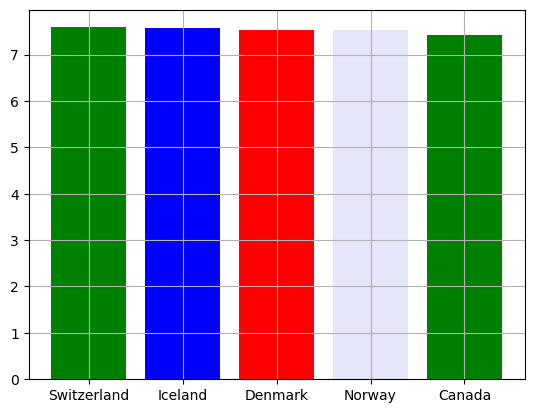

In [403]:
plt.bar(rank_counts.index,
        Score_counts.values,
        
        color=['green', 'blue', 'red', 'lavender'],
        
       )
plt.grid()
plt.show

In [404]:
yar7.head()

Country  Rank  Score  Standard Error  Economy (GDP per Capita)  \
0       Norway     1  7.537        0.057445                  1.616463   
1      Denmark     2  7.522        0.059728                  1.482383   
2      Iceland     3  7.504        0.118030                  1.480633   
3  Switzerland     4  7.494        0.067772                  1.564980   
4      Finland     5  7.469        0.058542                  1.443572   

     Family  Health (Life Expectancy)   Freedom  Generosity  \
0  1.533524                  0.796667  0.635423    0.362012   
1  1.551122                  0.792566  0.626007    0.355280   
2  1.610574                  0.833552  0.627163    0.475540   
3  1.516912                  0.858131  0.620071    0.290549   
4  1.540247                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe  
2                       0.153527           2.322715  Western Europe  
3                       0.367007           2.276716  Western Europe  
4                       0.382612           2.430182  Western Europe

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

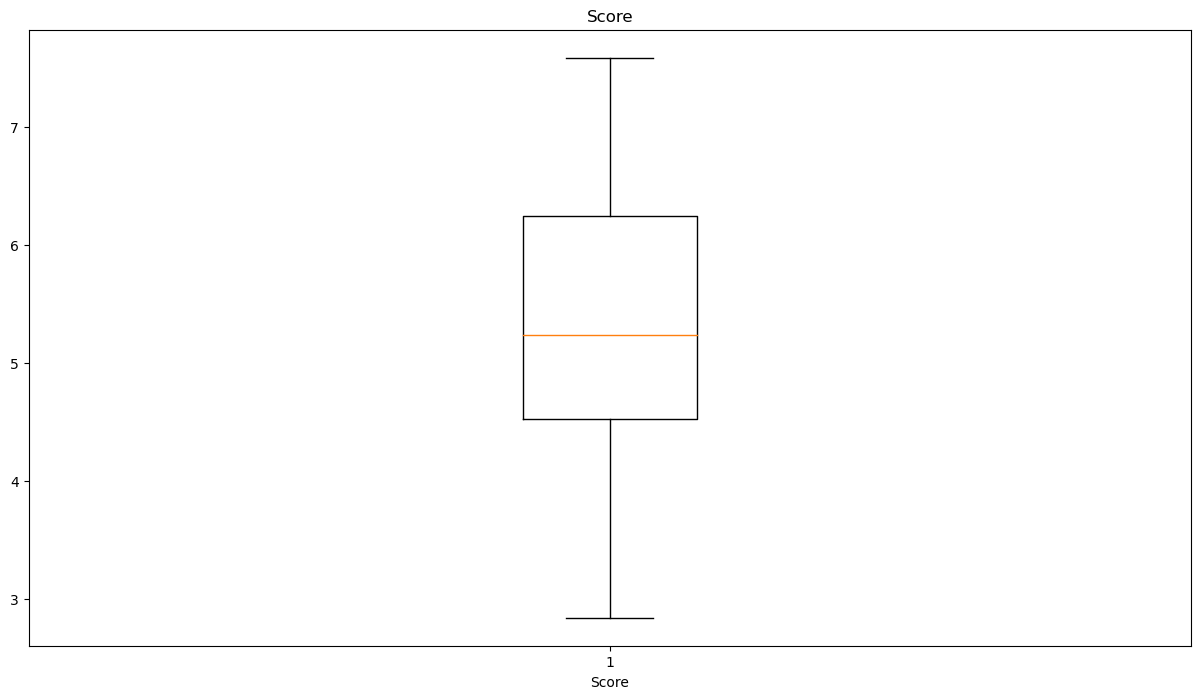

In [405]:
plt.figure(figsize=(15,8))
plt.boxplot(yar5['Score'])
plt.xlabel('Score')

plt.title(f'Score')
plt.show()

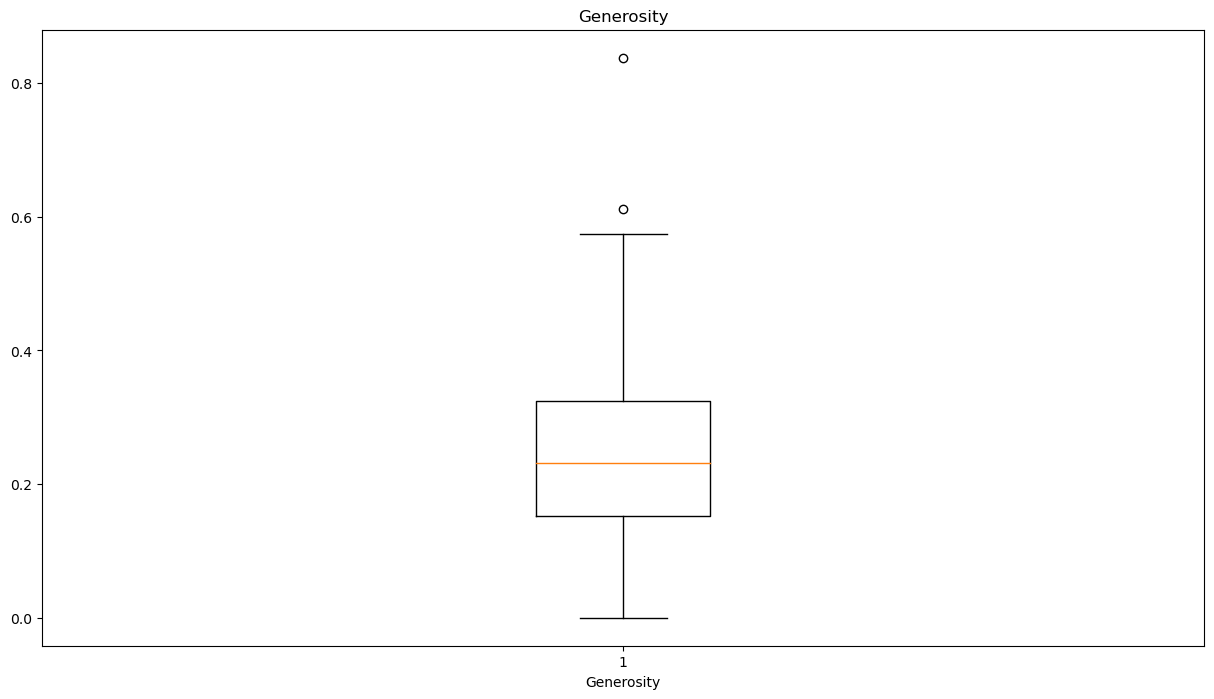

In [406]:
plt.figure(figsize=(15,8))
plt.boxplot(yar7['Generosity'])
plt.xlabel('Generosity')

plt.title(f'Generosity')
plt.show()

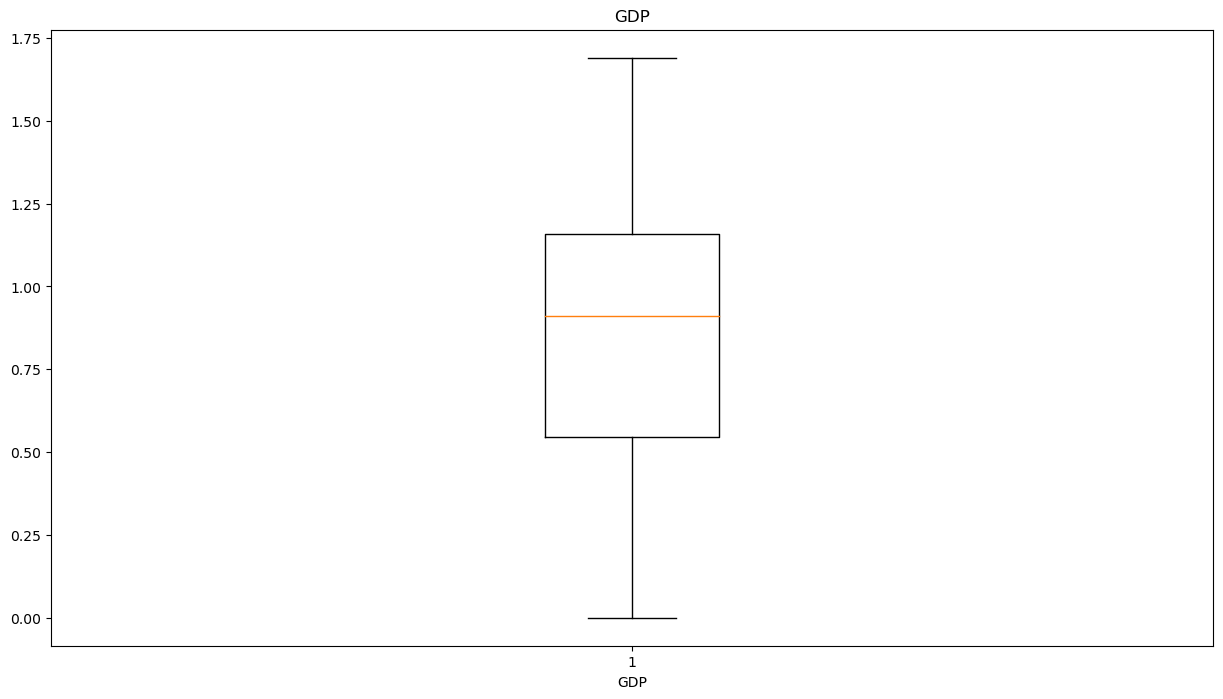

In [407]:

plt.figure(figsize=(15,8))
plt.boxplot(yar5['Economy (GDP per Capita)'])
plt.xlabel('GDP')

plt.title(f'GDP')
plt.show()

<Axes: ylabel='Economy (GDP per Capita)'>

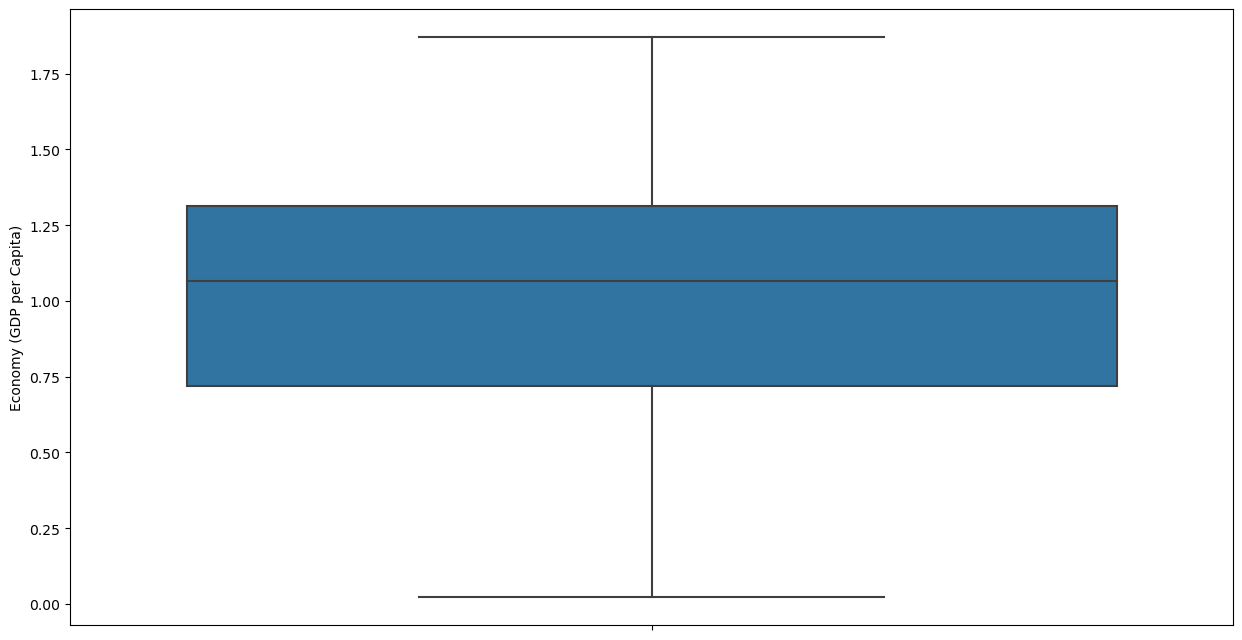

In [408]:
plt.figure(figsize=(15,8))


sns.boxplot(
    yar7,
    y="Economy (GDP per Capita)"
    
    


)

<Axes: xlabel='Score', ylabel='Count'>

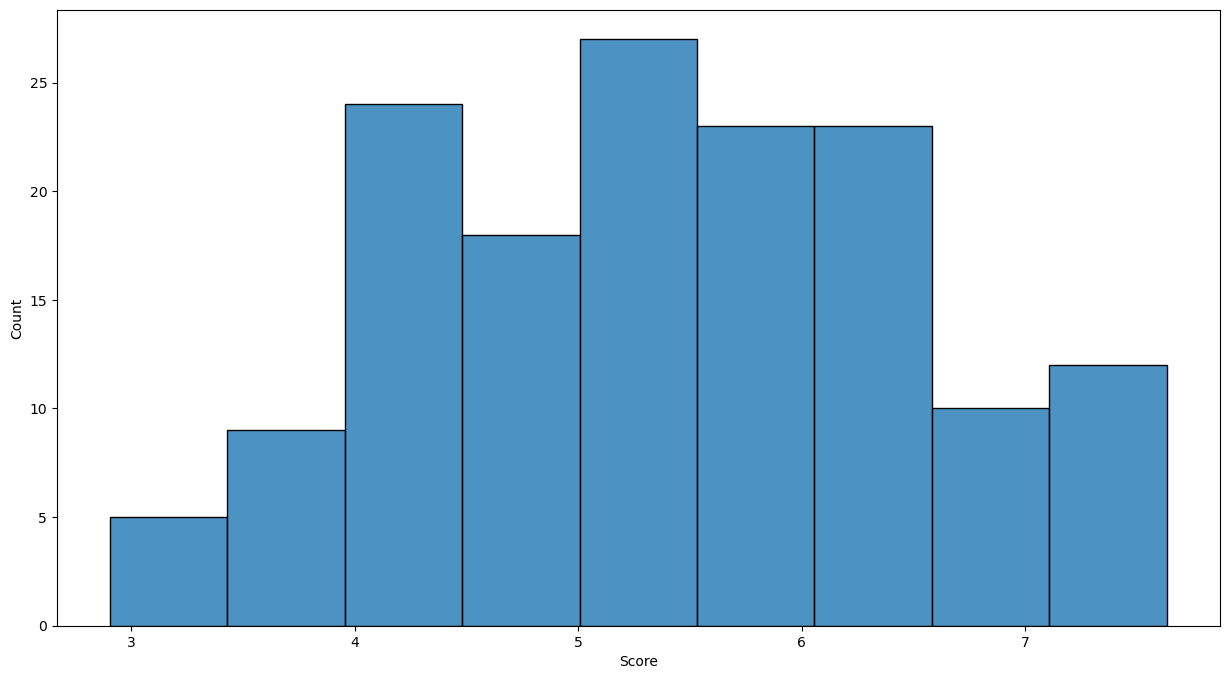

In [409]:

plt.figure(figsize=(15,8))
sns.histplot(
yar8,
    x="Score",
    alpha=0.8



)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Count'>

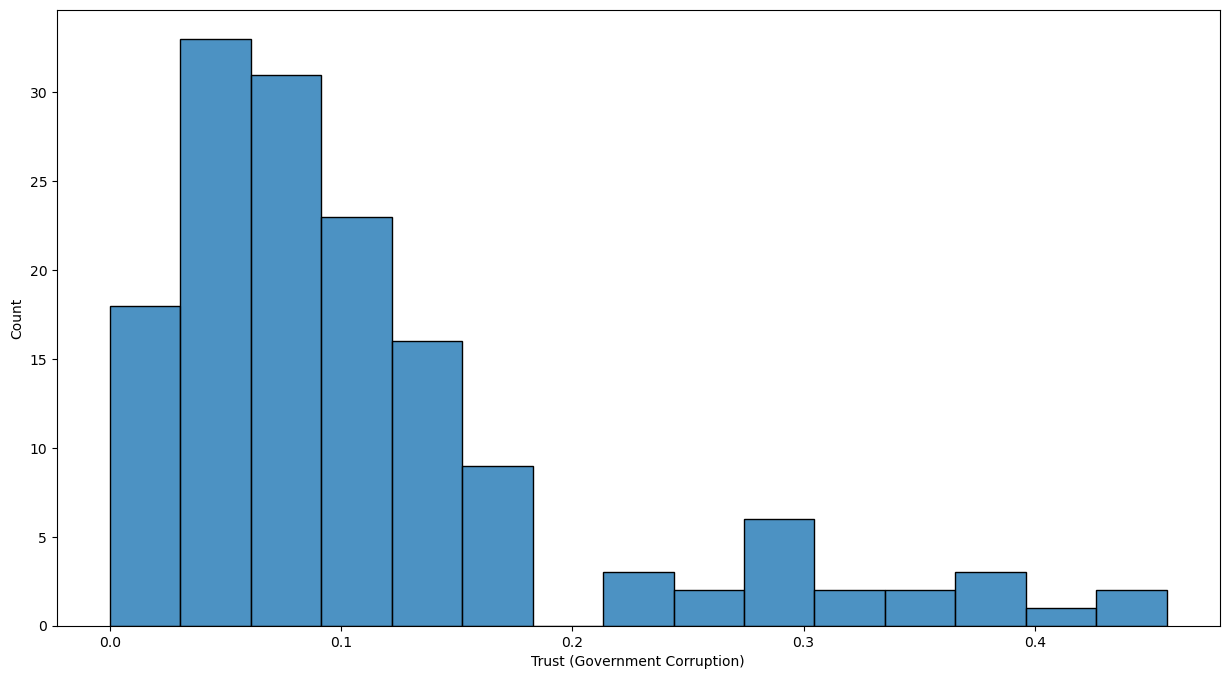

In [410]:
plt.figure(figsize=(15,8))
sns.histplot(
yar8,
    x="Trust (Government Corruption)",
    alpha=0.8



)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [411]:
yar9["Health (Life Expectancy)"].mode()

0    0.815
1    0.999
Name: Health (Life Expectancy), dtype: float64

In [412]:
yar9["Health (Life Expectancy)"].mean()

0.739554054054054

In [413]:
yar9["Health (Life Expectancy)"].median()

0.7965

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

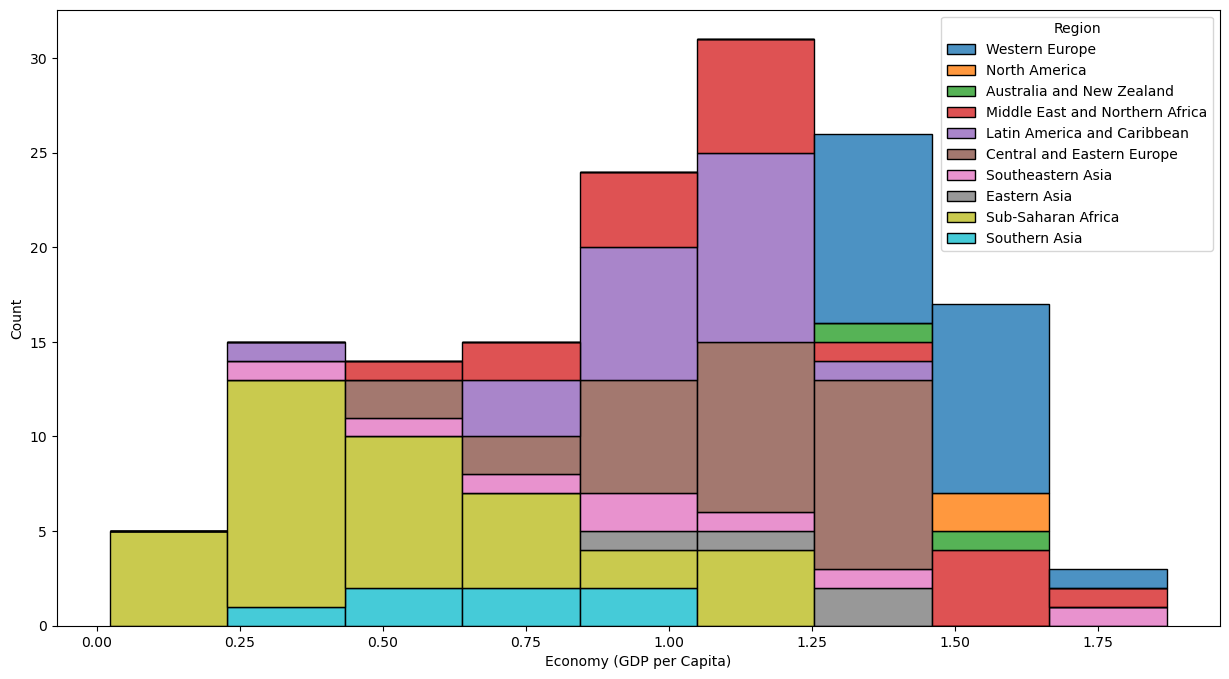

In [414]:
plt.figure(figsize=(15,8))
sns.histplot(
    yar7,
    x='Economy (GDP per Capita)',
    hue="Region", 
    multiple="stack", 
    alpha=0.8)

<Axes: xlabel='Family', ylabel='Count'>

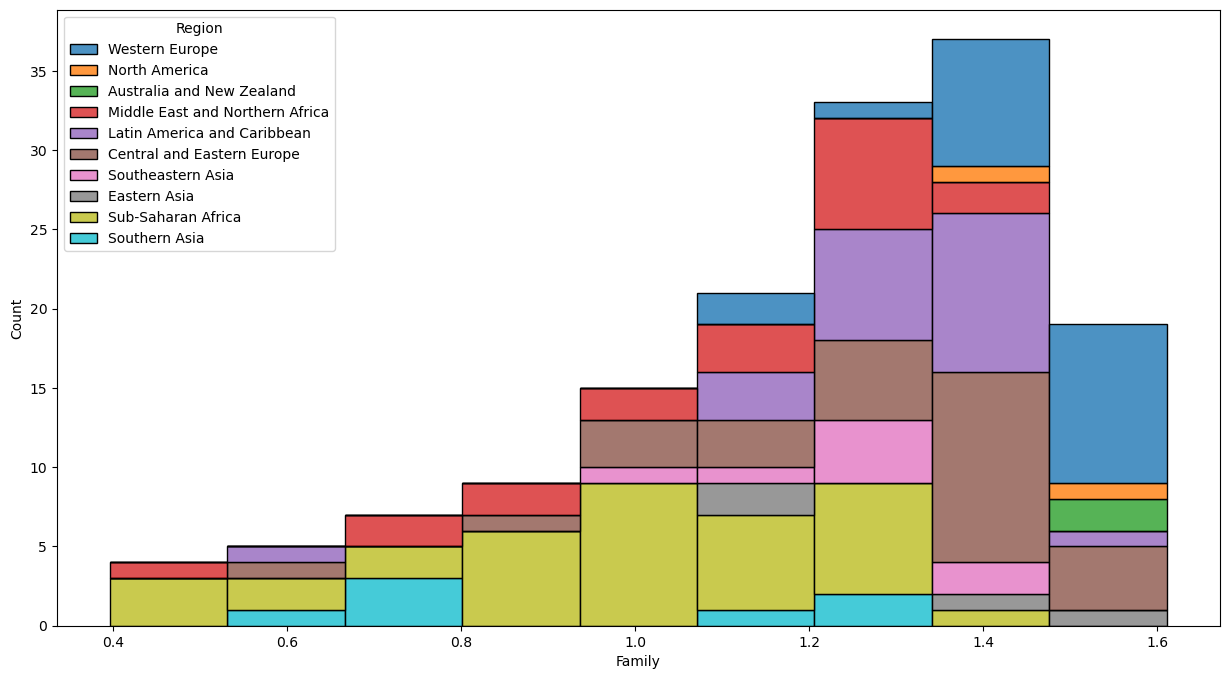

In [415]:
plt.figure(figsize=(15,8))
sns.histplot(
    yar7,
    x='Family',
    hue="Region", 
    multiple="stack",
    alpha=0.8)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

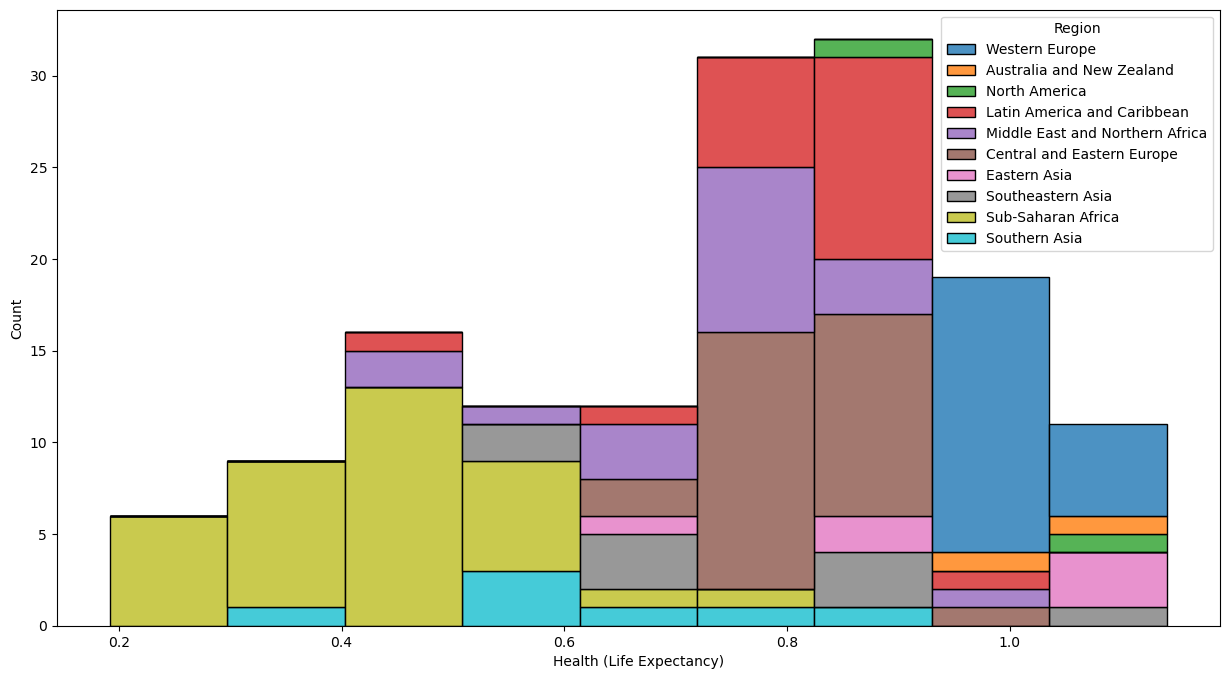

In [416]:
plt.figure(figsize=(15,8))
sns.histplot(
    yar9,
    x='Health (Life Expectancy)',
    hue="Region", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [417]:
yar5

Country                           Region  Rank  Score  \
0    Switzerland                   Western Europe     1  7.587   
1        Iceland                   Western Europe     2  7.561   
2        Denmark                   Western Europe     3  7.527   
3         Norway                   Western Europe     4  7.522   
4         Canada                    North America     5  7.427   
..           ...                              ...   ...    ...   
153       Rwanda               Sub-Saharan Africa   154  3.465   
154        Benin               Sub-Saharan Africa   155  3.340   
155        Syria  Middle East and Northern Africa   156  3.006   
156      Burundi               Sub-Saharan Africa   157  2.905   
157         Togo               Sub-Saharan Africa   158  2.839   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

**Categorical & numerical --> (scatter plot, histogram, box plot)**

<Axes: xlabel='Region', ylabel='Count'>

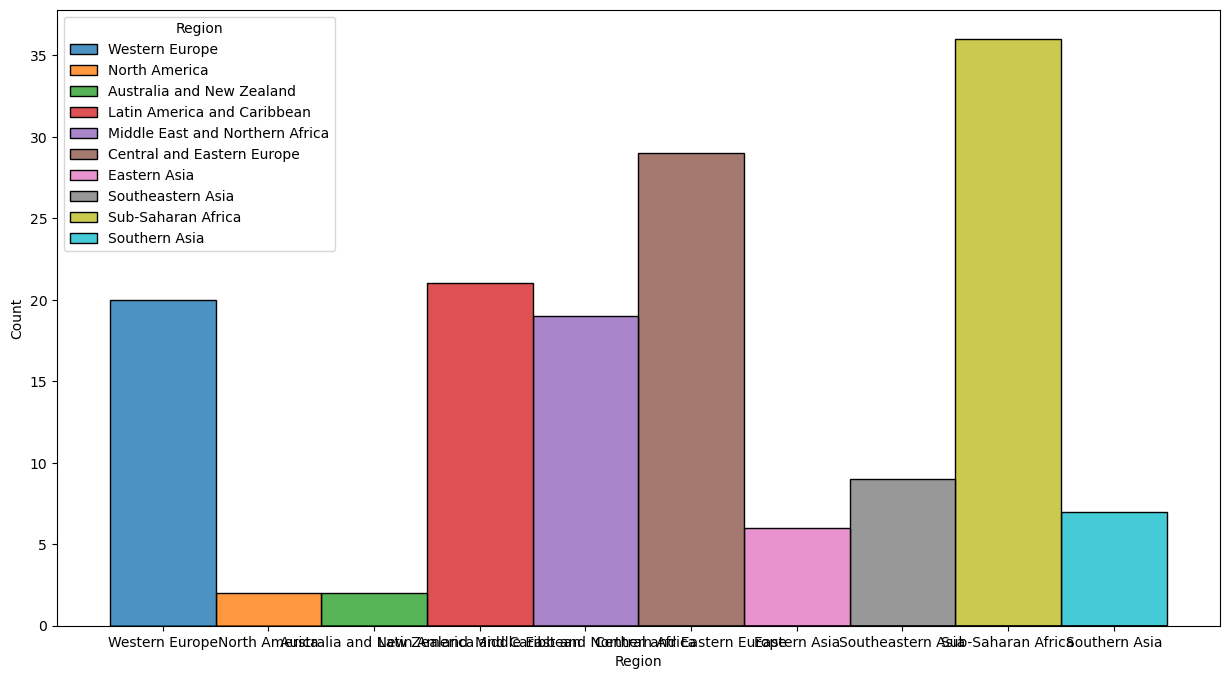

In [418]:

plt.figure(figsize=(15,8))
sns.histplot(
yar8,
    x="Region",
    alpha=0.8,
hue='Region'


)

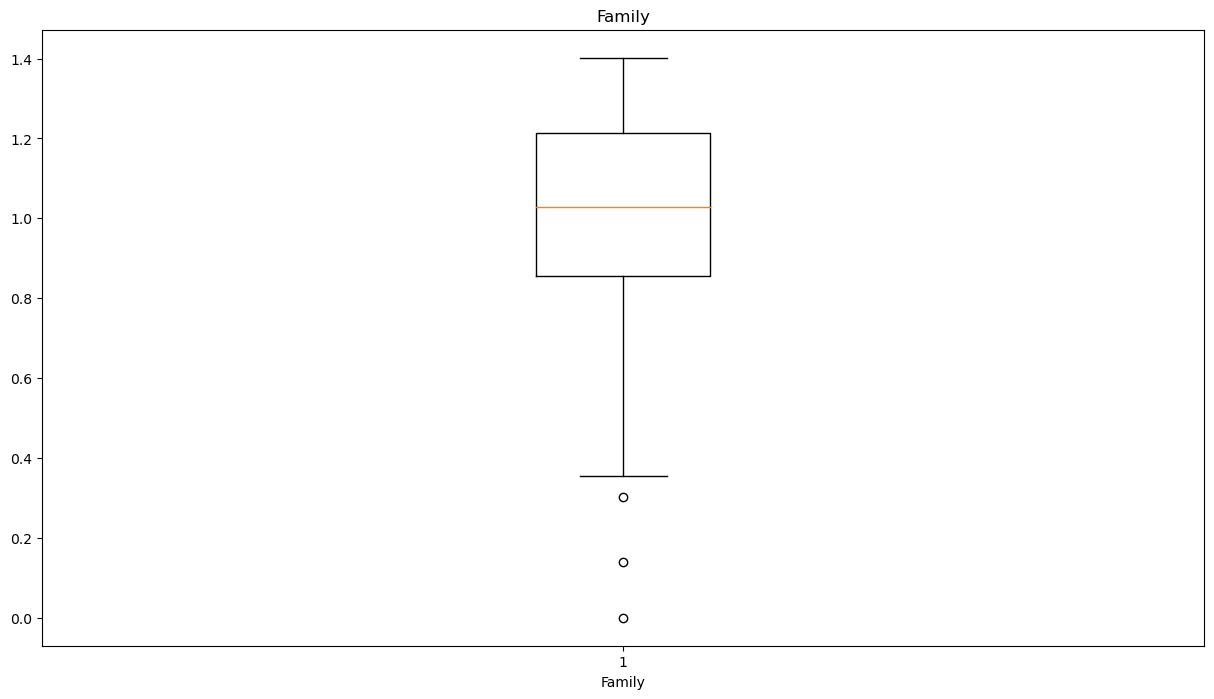

In [419]:

plt.figure(figsize=(15,8))
plt.boxplot(yar5['Family'])
plt.xlabel('Family')

plt.title(f'Family')
plt.show()

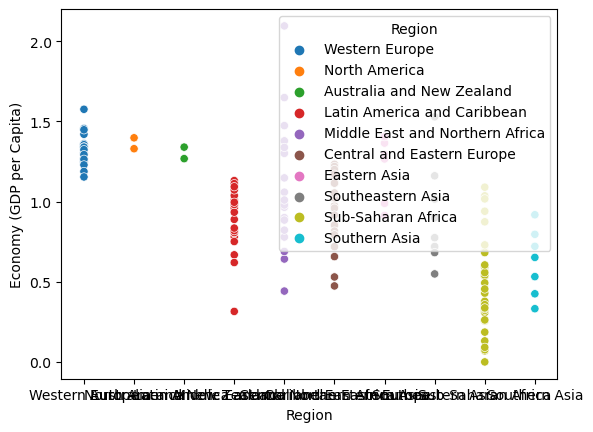

In [420]:
sns.scatterplot(y='Economy (GDP per Capita)', x='Region',
                hue='Region',
                data=yar8)



# Show the plot
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

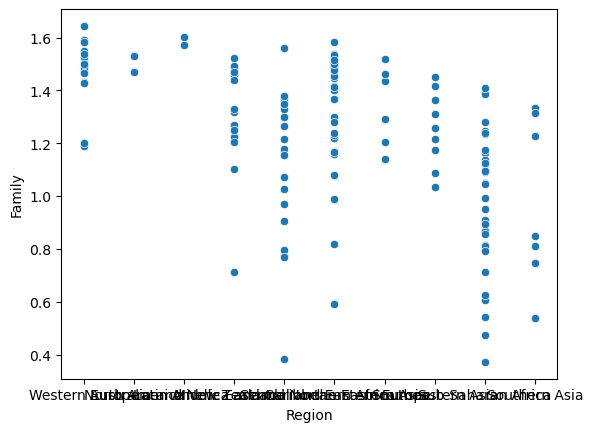

In [421]:
sns.scatterplot(y='Family', x='Region',
                #hue='Category',
                data=yar8)



# Show the plot
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [422]:
yar9.head()

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0     1      Finland  7.769                     1.340   1.587   
1     2      Denmark  7.600                     1.383   1.573   
2     3       Norway  7.554                     1.488   1.582   
3     4      Iceland  7.494                     1.380   1.624   
4     5  Netherlands  7.488                     1.396   1.522   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.986    0.596       0.153   
1                     0.996    0.592       0.252   
2                     1.028    0.603       0.271   
3                     1.026    0.591       0.354   
4                     0.999    0.557       0.322   

   Trust (Government Corruption)          Region  
0                          0.393  Western Europe  
1                          0.410  Western Europe  
2                          0.341  Western Europe  
3                          0.118  Western Europe  
4                          0.298  Western Europe

In [423]:
corr_matrix = yar9.select_dtypes(include=np.number).corr()
corr_matrix

Rank     Score  Economy (GDP per Capita)  \
Rank                           1.000000 -0.989242                 -0.796398   
Score                         -0.989242  1.000000                  0.786979   
Economy (GDP per Capita)      -0.796398  0.786979                  1.000000   
Family                        -0.775140  0.778060                  0.749174   
Health (Life Expectancy)      -0.786641  0.778304                  0.851698   
Freedom                       -0.548421  0.567790                  0.382850   
Generosity                    -0.044330  0.075442                 -0.073801   
Trust (Government Corruption) -0.367535  0.398907                  0.315270   

                                 Family  Health (Life Expectancy)   Freedom  \
Rank                          -0.775140                 -0.786641 -0.548421   
Score                          0.778060                  0.778304  0.567790   
Economy (GDP per Capita)       0.749174                  0.851698  0.382850   
Family                         1.000000                  0.737586  0.447146   
Health (Life Expectancy)       0.737586                  1.000000  0.401652   
Freedom                        0.447146                  0.401652  1.000000   
Generosity                    -0.033407                 -0.053281  0.273292   
Trust (Government Corruption)  0.186060                  0.320591  0.442924   

                               Generosity  Trust (Government Corruption)  
Rank                            -0.044330                      -0.367535  
Score                            0.075442                       0.398907  
Economy (GDP per Capita)        -0.073801                       0.315270  
Family                          -0.033407                       0.186060  
Health (Life Expectancy)        -0.053281                       0.320591  
Freedom                          0.273292                       0.442924  
Generosity                       1.000000                       0.333053  
Trust (Government Corruption)    0.333053                       1.000000

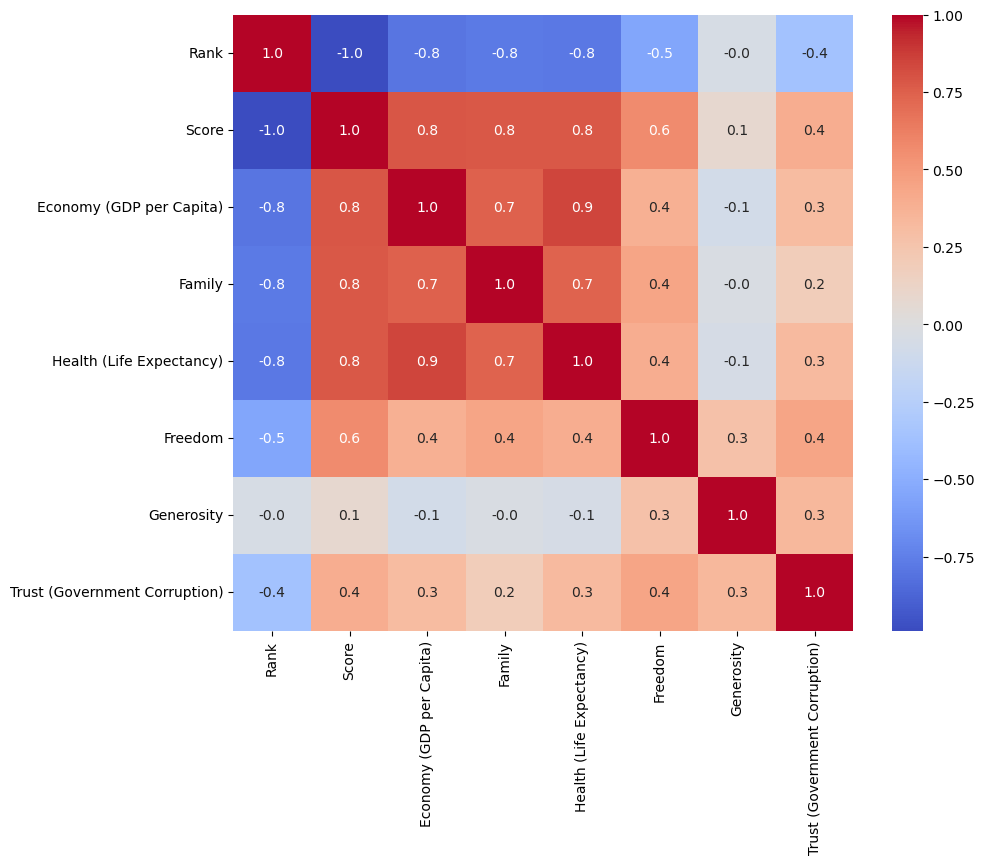

In [424]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [425]:
corr_matrix = yar8.select_dtypes(include=np.number).corr()
corr_matrix

Rank     Score  Economy (GDP per Capita)  \
Rank                           1.000000 -0.991938                 -0.798293   
Score                         -0.991938  1.000000                  0.793779   
Economy (GDP per Capita)      -0.798293  0.793779                  1.000000   
Family                        -0.741565  0.744611                  0.658984   
Health (Life Expectancy)      -0.773721  0.768375                  0.838225   
Freedom                       -0.531715  0.545466                  0.331205   
Generosity                    -0.106645  0.140541                 -0.007157   
Trust (Government Corruption) -0.367209  0.400529                  0.294815   

                                 Family  Health (Life Expectancy)   Freedom  \
Rank                          -0.741565                 -0.773721 -0.531715   
Score                          0.744611                  0.768375  0.545466   
Economy (GDP per Capita)       0.658984                  0.838225  0.331205   
Family                         1.000000                  0.665046  0.413115   
Health (Life Expectancy)       0.665046                  1.000000  0.362216   
Freedom                        0.413115                  0.362216  1.000000   
Generosity                     0.032245                  0.021526  0.301452   
Trust (Government Corruption)  0.231181                  0.318560  0.470081   

                               Generosity  Trust (Government Corruption)  
Rank                            -0.106645                      -0.367209  
Score                            0.140541                       0.400529  
Economy (GDP per Capita)        -0.007157                       0.294815  
Family                           0.032245                       0.231181  
Health (Life Expectancy)         0.021526                       0.318560  
Freedom                          0.301452                       0.470081  
Generosity                       1.000000                       0.363831  
Trust (Government Corruption)    0.363831                       1.000000

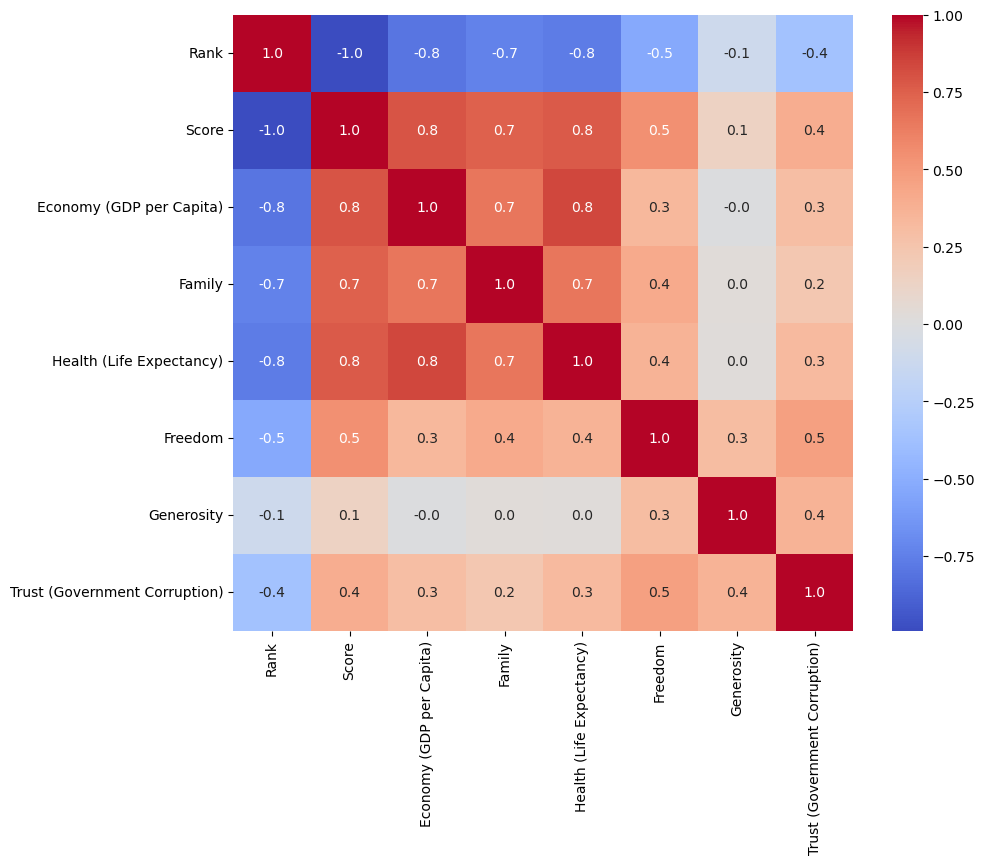

In [426]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [427]:
corr_matrix = yar7.select_dtypes(include=np.number).corr()
corr_matrix

Rank     Score  Standard Error  \
Rank                           1.000000 -0.993863        0.281394   
Score                         -0.993863  1.000000       -0.305634   
Standard Error                 0.281394 -0.305634        1.000000   
Economy (GDP per Capita)      -0.810925  0.808013       -0.215394   
Family                        -0.741944  0.747616       -0.266073   
Health (Life Expectancy)      -0.778987  0.778304       -0.335215   
Freedom                       -0.558714  0.578406       -0.215645   
Generosity                    -0.134634  0.160384       -0.047096   
Trust (Government Corruption) -0.417292  0.442291       -0.248685   
Dystopia Residual             -0.511498  0.506639       -0.080703   

                               Economy (GDP per Capita)    Family  \
Rank                                          -0.810925 -0.741944   
Score                                          0.808013  0.747616   
Standard Error                                -0.215394 -0.266073   
Economy (GDP per Capita)                       1.000000  0.675163   
Family                                         0.675163  1.000000   
Health (Life Expectancy)                       0.831650  0.602375   
Freedom                                        0.375743  0.433749   
Generosity                                    -0.023300  0.065277   
Trust (Government Corruption)                  0.356151  0.236054   
Dystopia Residual                              0.059348  0.100161   

                               Health (Life Expectancy)   Freedom  Generosity  \
Rank                                          -0.778987 -0.558714   -0.134634   
Score                                          0.778304  0.578406    0.160384   
Standard Error                                -0.335215 -0.215645   -0.047096   
Economy (GDP per Capita)                       0.831650  0.375743   -0.023300   
Family                                         0.602375  0.433749    0.065277   
Health (Life Expectancy)                       1.000000  0.359725    0.056829   
Freedom                                        0.359725  1.000000    0.315447   
Generosity                                     0.056829  0.315447    1.000000   
Trust (Government Corruption)                  0.282628  0.495048    0.288277   
Dystopia Residual                              0.092888  0.094245   -0.112874   

                               Trust (Government Corruption)  \
Rank                                               -0.417292   
Score                                               0.442291   
Standard Error                                     -0.248685   
Economy (GDP per Capita)                            0.356151   
Family                                              0.236054   
Health (Life Expectancy)                            0.282628   
Freedom                                             0.495048   
Generosity                                          0.288277   
Trust (Government Corruption)                       1.000000   
Dystopia Residual                                   0.005897   

                               Dystopia Residual  
Rank                                   -0.511498  
Score                                   0.506639  
Standard Error                         -0.080703  
Economy (GDP per Capita)                0.059348  
Family                                  0.100161  
Health (Life Expectancy)                0.092888  
Freedom                                 0.094245  
Generosity                             -0.112874  
Trust (Government Corruption)           0.005897  
Dystopia Residual                       1.000000

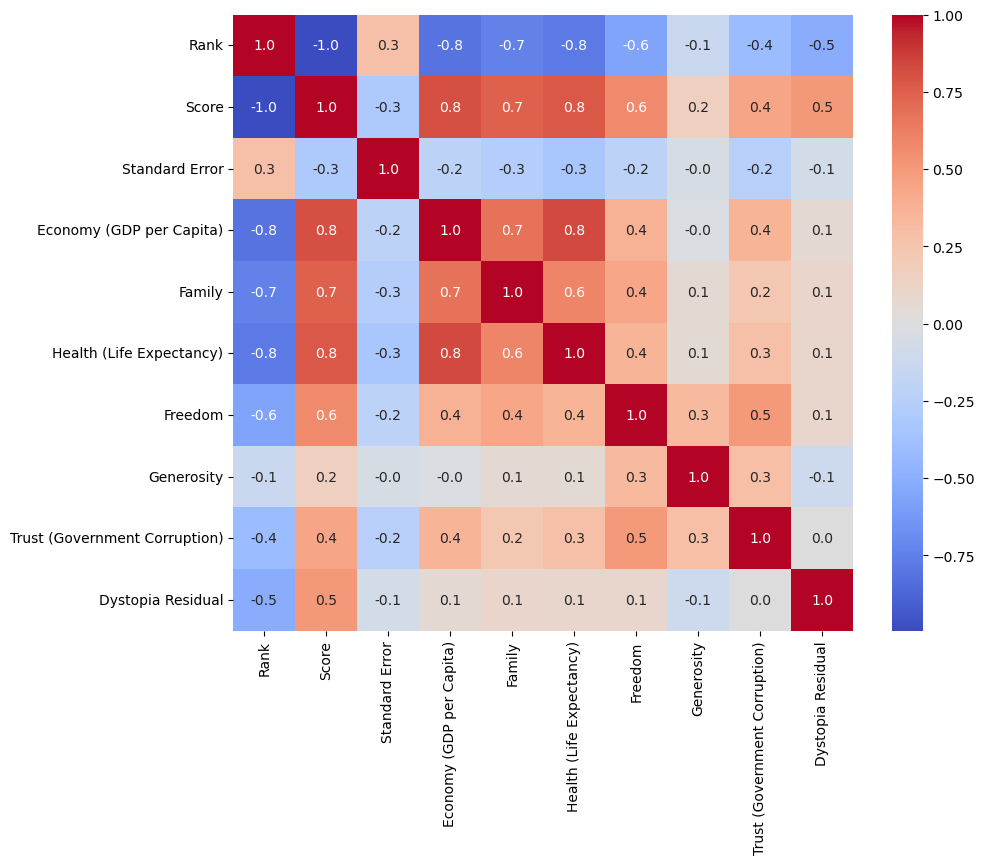

In [428]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [429]:
corr_matrix = yar6.select_dtypes(include=np.number).corr()
corr_matrix

Rank     Score  Standard Error  \
Rank                           1.000000 -0.995743        0.144960   
Score                         -0.995743  1.000000       -0.154919   
Standard Error                 0.144960 -0.154919        1.000000   
Economy (GDP per Capita)      -0.793577  0.790322       -0.145784   
Family                        -0.733276  0.739252       -0.196159   
Health (Life Expectancy)      -0.767991  0.765384       -0.247463   
Freedom                       -0.557169  0.566827       -0.097748   
Trust (Government Corruption) -0.387102  0.402032       -0.155086   
Generosity                    -0.145369  0.156848       -0.063016   
Dystopia Residual             -0.542616  0.543738        0.059360   

                               Economy (GDP per Capita)    Family  \
Rank                                          -0.793577 -0.733276   
Score                                          0.790322  0.739252   
Standard Error                                -0.145784 -0.196159   
Economy (GDP per Capita)                       1.000000  0.669540   
Family                                         0.669540  1.000000   
Health (Life Expectancy)                       0.837067  0.588377   
Freedom                                        0.362283  0.450208   
Trust (Government Corruption)                  0.294185  0.213561   
Generosity                                    -0.025531  0.089629   
Dystopia Residual                              0.068624  0.119672   

                               Health (Life Expectancy)   Freedom  \
Rank                                          -0.767991 -0.557169   
Score                                          0.765384  0.566827   
Standard Error                                -0.247463 -0.097748   
Economy (GDP per Capita)                       0.837067  0.362283   
Family                                         0.588377  0.450208   
Health (Life Expectancy)                       1.000000  0.341199   
Freedom                                        0.341199  1.000000   
Trust (Government Corruption)                  0.249583  0.502054   
Generosity                                     0.075987  0.361751   
Dystopia Residual                              0.100857  0.091631   

                               Trust (Government Corruption)  Generosity  \
Rank                                               -0.387102   -0.145369   
Score                                               0.402032    0.156848   
Standard Error                                     -0.155086   -0.063016   
Economy (GDP per Capita)                            0.294185   -0.025531   
Family                                              0.213561    0.089629   
Health (Life Expectancy)                            0.249583    0.075987   
Freedom                                             0.502054    0.361751   
Trust (Government Corruption)                       1.000000    0.305930   
Generosity                                          0.305930    1.000000   
Dystopia Residual                                  -0.002909   -0.133001   

                               Dystopia Residual  
Rank                                   -0.542616  
Score                                   0.543738  
Standard Error                          0.059360  
Economy (GDP per Capita)                0.068624  
Family                                  0.119672  
Health (Life Expectancy)                0.100857  
Freedom                                 0.091631  
Trust (Government Corruption)          -0.002909  
Generosity                             -0.133001  
Dystopia Residual                       1.000000

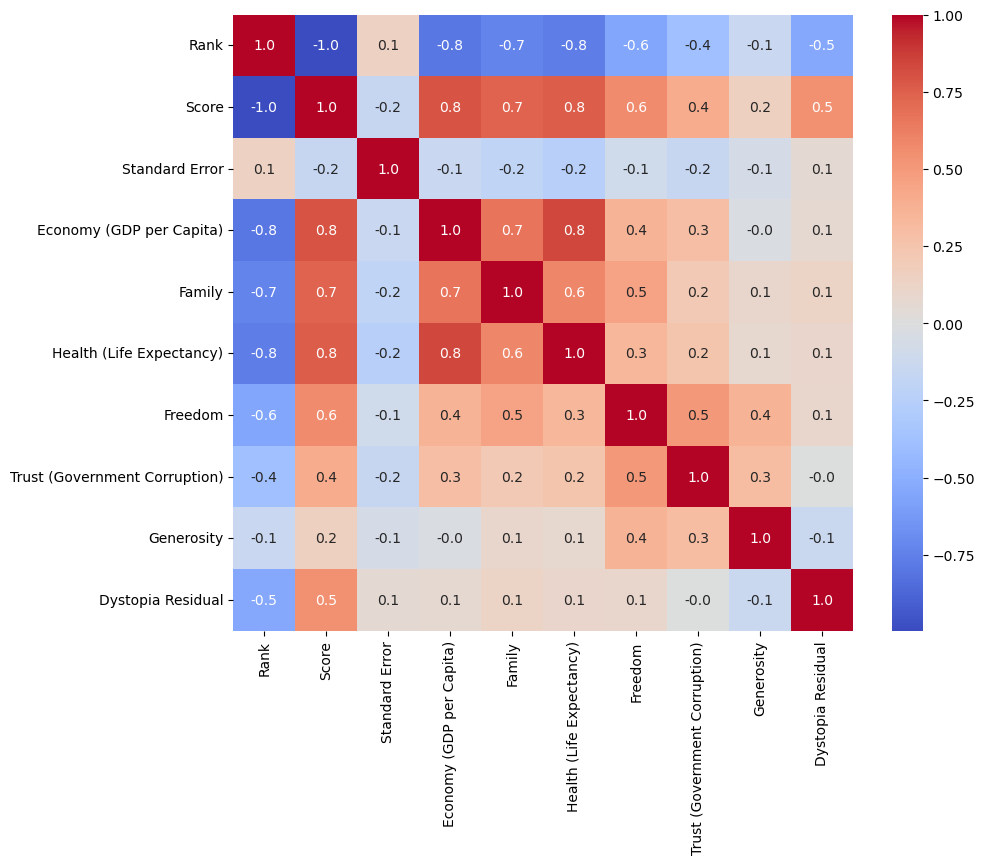

In [430]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [431]:
corr_matrix = yar5.select_dtypes(include=np.number).corr()
corr_matrix

Rank     Score  Standard Error  \
Rank                           1.000000 -0.992105        0.158516   
Score                         -0.992105  1.000000       -0.177254   
Standard Error                 0.158516 -0.177254        1.000000   
Economy (GDP per Capita)      -0.785267  0.780966       -0.217651   
Family                        -0.733644  0.740605       -0.120728   
Health (Life Expectancy)      -0.735613  0.724200       -0.310287   
Freedom                       -0.556886  0.568211       -0.129773   
Trust (Government Corruption) -0.372315  0.395199       -0.178325   
Generosity                    -0.160142  0.180319       -0.088439   
Dystopia Residual             -0.521999  0.530474        0.083981   

                               Economy (GDP per Capita)    Family  \
Rank                                          -0.785267 -0.733644   
Score                                          0.780966  0.740605   
Standard Error                                -0.217651 -0.120728   
Economy (GDP per Capita)                       1.000000  0.645299   
Family                                         0.645299  1.000000   
Health (Life Expectancy)                       0.816478  0.531104   
Freedom                                        0.370300  0.441518   
Trust (Government Corruption)                  0.307885  0.205605   
Generosity                                    -0.010465  0.087513   
Dystopia Residual                              0.040059  0.148117   

                               Health (Life Expectancy)   Freedom  \
Rank                                          -0.735613 -0.556886   
Score                                          0.724200  0.568211   
Standard Error                                -0.310287 -0.129773   
Economy (GDP per Capita)                       0.816478  0.370300   
Family                                         0.531104  0.441518   
Health (Life Expectancy)                       1.000000  0.360477   
Freedom                                        0.360477  1.000000   
Trust (Government Corruption)                  0.248335  0.493524   
Generosity                                     0.108335  0.373916   
Dystopia Residual                              0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Rank                                               -0.372315   -0.160142   
Score                                               0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Rank                                   -0.521999  
Score                                   0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

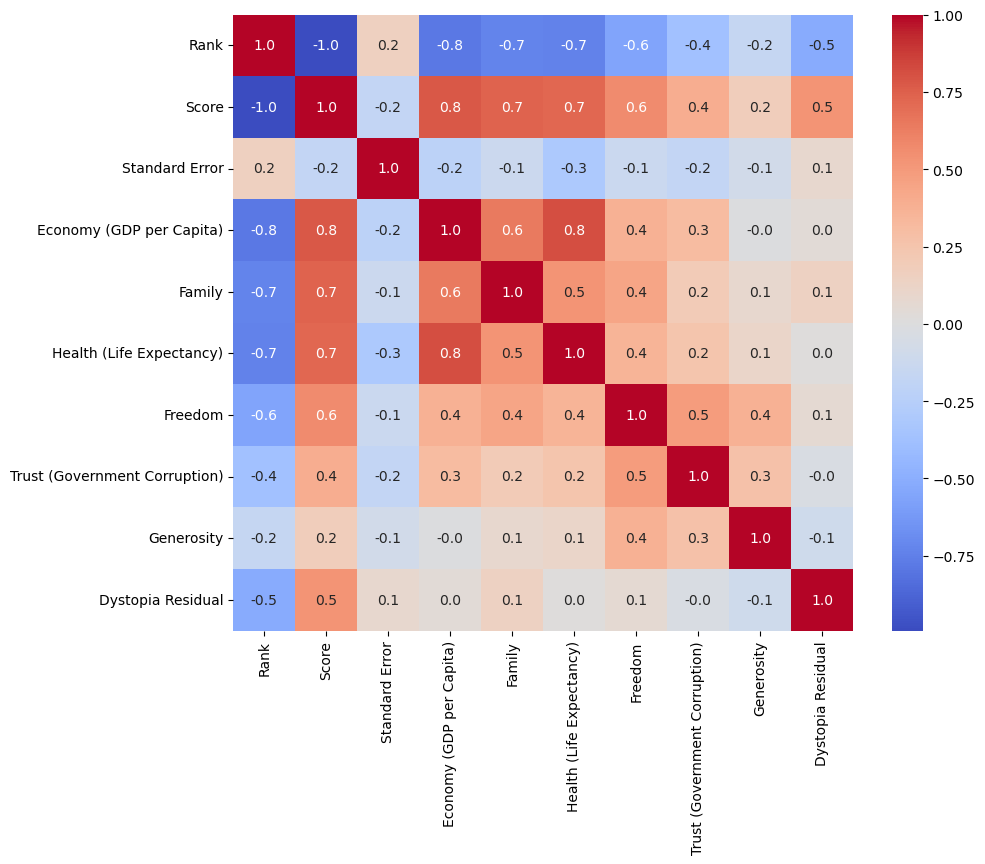

In [432]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [433]:
###q1------------------------

In [434]:
yar5.head(1)

Country          Region  Rank  Score  Standard Error  \
0  Switzerland  Western Europe     1  7.587         0.03411   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738

In [435]:
country=yar5["Country"].head(10)
Score=yar5["Score"].head(10)


In [436]:
country

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
5        Finland
6    Netherlands
7         Sweden
8    New Zealand
9      Australia
Name: Country, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

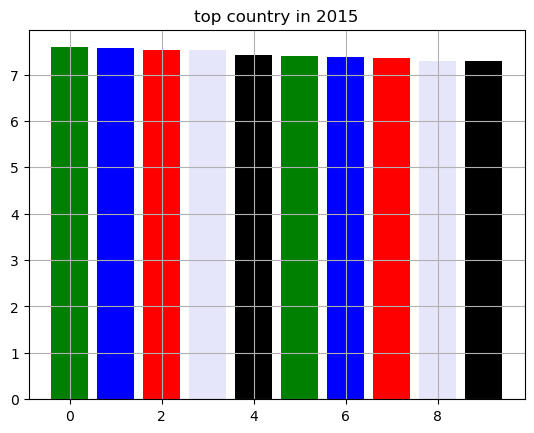

In [437]:
plt.bar(country.index,
        Score.values,
        
        color=['green', 'blue', 'red', 'lavender','black'],
        
       )
plt.title("top country in 2015")
plt.grid()
plt.show

In [438]:
yar9.head()

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0     1      Finland  7.769                     1.340   1.587   
1     2      Denmark  7.600                     1.383   1.573   
2     3       Norway  7.554                     1.488   1.582   
3     4      Iceland  7.494                     1.380   1.624   
4     5  Netherlands  7.488                     1.396   1.522   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.986    0.596       0.153   
1                     0.996    0.592       0.252   
2                     1.028    0.603       0.271   
3                     1.026    0.591       0.354   
4                     0.999    0.557       0.322   

   Trust (Government Corruption)          Region  
0                          0.393  Western Europe  
1                          0.410  Western Europe  
2                          0.341  Western Europe  
3                          0.118  Western Europe  
4                          0.298  Western Europe

In [439]:
Switzerland=yar9.loc[0]
Switzerlandsl=Switzerland['Economy (GDP per Capita)':'Trust (Government Corruption)']
Switzerlandsl

Economy (GDP per Capita)          1.34
Family                           1.587
Health (Life Expectancy)         0.986
Freedom                          0.596
Generosity                       0.153
Trust (Government Corruption)    0.393
Name: 0, dtype: object

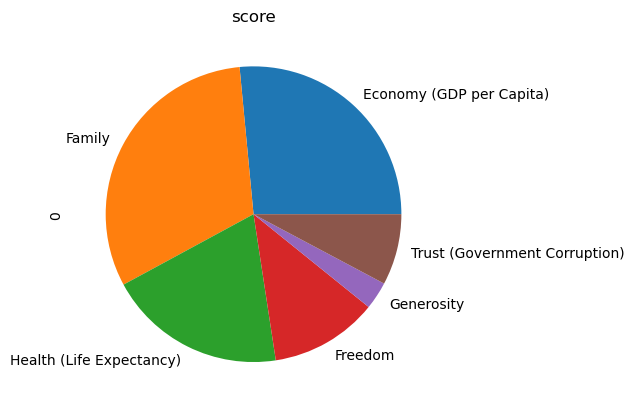

In [440]:
Switzerlandsl.plot(kind='pie')
plt.title("score")
plt.show()

In [441]:
yar9['Region'].unique()


array(['Western Europe', 'Australia and New Zealand', 'North America',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [442]:
# Western_Europe = yar9[yar9["Region"]=='Western Europe']
# Australia = marathon_df[marathon_df["Category"]=='Australia and New Zealand']
# North_America = marathon_df[marathon_df["Category"]=='North America']
# Latin_America = marathon_df[marathon_df["Category"]=='Latin America and Caribbean']
# Middle_East = marathon_df[marathon_df["Category"]=='Middle East and Northern Africa']
# Eastern_Europe = marathon_df[marathon_df["Category"]=='Central and Eastern Europe']
# Eastern_Asia = marathon_df[marathon_df["Category"]=='Eastern Asia']
# Southeastern_Asia = marathon_df[marathon_df["Category"]=='Southeastern Asia']
# Sub-Saharan_Africa = marathon_df[marathon_df["Category"]=='Sub-Saharan Africa']
# Southern_Asia = marathon_df[marathon_df["Category"]=='Southern Asia']


In [443]:
yar9.head(1)

Rank  Country  Score  Economy (GDP per Capita)  Family  \
0     1  Finland  7.769                      1.34   1.587   

   Health (Life Expectancy)  Freedom  Generosity  \
0                     0.986    0.596       0.153   

   Trust (Government Corruption)          Region  
0                          0.393  Western Europe

In [444]:
counts_gender = yar9['Region'].head(20).value_counts()
counts_gender

Western Europe                     13
Australia and New Zealand           2
North America                       2
Latin America and Caribbean         1
Middle East and Northern Africa     1
Central and Eastern Europe          1
Name: Region, dtype: int64

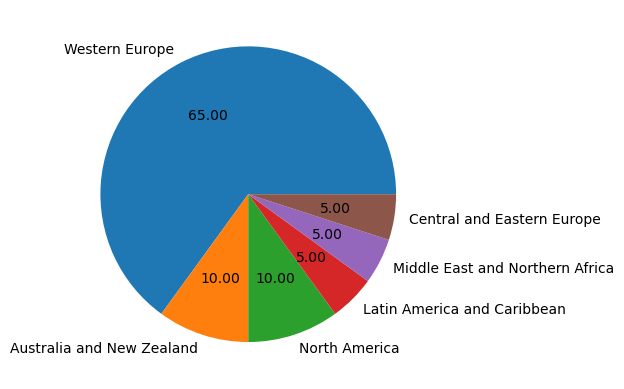

In [445]:
plt.pie(counts_gender,
        labels=counts_gender.index,
        normalize=True,
        autopct="%.2f",
        # textprops = {'color':'white'},
        # color=['red', 'blue']
       )
plt.show()

In [446]:
###q2------------------------

In [447]:
y5=yar5["Score"].mean()
y6=yar6["Score"].mean()
y7=yar7["Score"].mean()
y7
mean = {'mean': [y5, y6, y7],
           'year':['2015','2016','2017']}


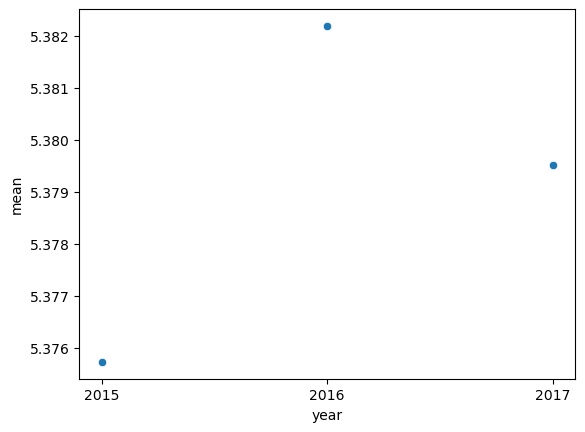

In [448]:

sns.scatterplot(y='mean', x='year',
                #hue='Category',
                data=mean)



# Show the plot
plt.show()

In [449]:
y5=yar5["Score"].median()
y6=yar6["Score"].median()
y7=yar7["Score"].median()

mode = {'mode': [y5, y6, y7],
        'year':['2015','2016','2017']}
mode

{'mode': [5.2325, 5.314, 5.28600001335144], 'year': ['2015', '2016', '2017']}

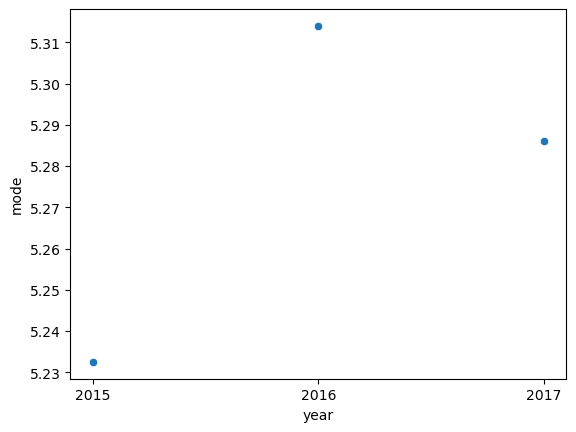

In [450]:

sns.scatterplot(y='mode', x='year',
                data=mode)



plt.show()

In [451]:
yar9

Rank      Country  Score  Economy (GDP per Capita)  Family  \
0       1      Finland  7.769                     1.340   1.587   
1       2      Denmark  7.600                     1.383   1.573   
2       3       Norway  7.554                     1.488   1.582   
3       4      Iceland  7.494                     1.380   1.624   
4       5  Netherlands  7.488                     1.396   1.522   
..    ...          ...    ...                       ...     ...   
143   151        Yemen  3.380                     0.287   1.163   
144   152       Rwanda  3.334                     0.359   0.711   
145   153     Tanzania  3.231                     0.476   0.885   
146   154  Afghanistan  3.203                     0.350   0.517   
147   156  South Sudan  2.853                     0.306   0.575   

     Health (Life Expectancy)  Freedom  Generosity  \
0                       0.986    0.596       0.153   
1                       0.996    0.592       0.252   
2                       1.028    0.603       0.271   
3                       1.026    0.591       0.354   
4                       0.999    0.557       0.322   
..                        ...      ...         ...   
143                     0.463    0.143       0.108   
144                     0.614    0.555       0.217   
145                     0.499    0.417       0.276   
146                     0.361    0.000       0.158   
147                     0.295    0.010       0.202   

     Trust (Government Corruption)                           Region  
0                            0.393                   Western Europe  
1                            0.410                   Western Europe  
2                            0.341                   Western Europe  
3                            0.118                   Western Europe  
4                            0.298                   Western Europe  
..                             ...                              ...  
143                          0.077  Middle East and Northern Africa  
144                          0.411               Sub-Saharan Africa  
145                          0.147               Sub-Saharan Africa  
146                          0.025                    Southern Asia  
147                          0.091               Sub-Saharan Africa  

[148 rows x 10 columns]

In [452]:
c5=yar5["Country"].head
c6=yar6["Country"]
c7=yar7["Country"]
c7

0           Norway
1          Denmark
2          Iceland
3      Switzerland
4          Finland
          ...     
145           Togo
146         Rwanda
147          Syria
148       Tanzania
149        Burundi
Name: Country, Length: 150, dtype: object

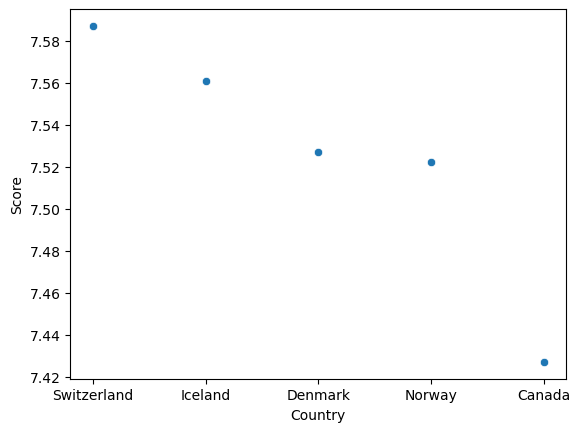

In [453]:
sns.scatterplot(y='Score', x='Country',
                #hue='Category',
                data=yar5.head(5))



# Show the plot
plt.show()

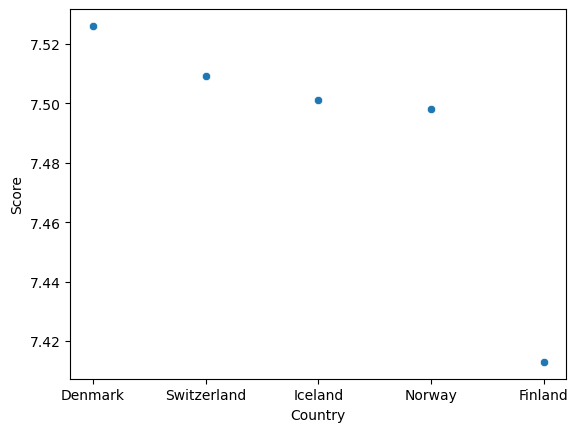

In [454]:
sns.scatterplot(y='Score', x='Country',
                #hue='Category',
                data=yar6.head(5))



# Show the plot
plt.show()

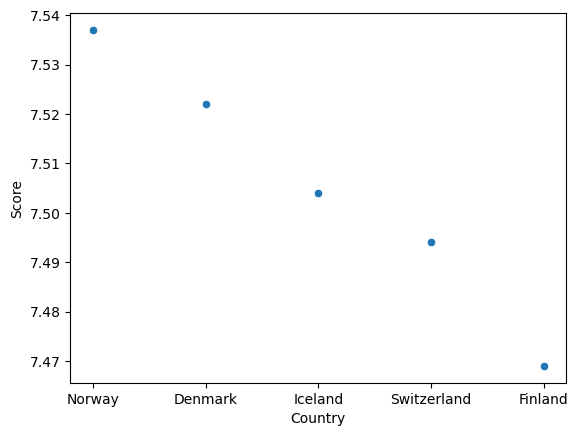

In [455]:
sns.scatterplot(y='Score', x='Country',
                #hue='Category',
                data=yar7.head(5))



# Show the plot
plt.show()

In [456]:
###q3------------------------

In [457]:
# y5=yar5[['Rank','Country']]
# y6=yar6[['Rank','Country']]
# # for i in y5['Country'].values():
# #     if (y6['Country']==i):
# #         print(y5['Country'])
# ye5=
# for country in y5['Country'].unique():
#     if country in y6['Country'].values:
#         ye5=y6['Rank'].
#         ye6=

#         if (y6['Rank'].values-y5['Rank'].values>5):
#             print(y6['Rank'].values-y5['Rank'].values) 

In [458]:
y5=yar5[['Rank','Country']]
y6=yar6[['Rank','Country']]
y7=yar7[['Rank','Country']]
y8=yar8[['Rank','Country']]
y9=yar9[['Rank','Country']]



In [459]:
big_y=y6.merge(y5,on='Country', how='outer')


In [460]:
big_y.head()

Rank_x      Country  Rank_y
0     1.0      Denmark     3.0
1     2.0  Switzerland     1.0
2     3.0      Iceland     2.0
3     4.0       Norway     4.0
4     5.0      Finland     6.0

In [461]:
big_y.rename(columns={'Rank_x': '2015','Rank_y':'2016'}, inplace=True)

In [462]:
big_y.head()

2015      Country  2016
0   1.0      Denmark   3.0
1   2.0  Switzerland   1.0
2   3.0      Iceland   2.0
3   4.0       Norway   4.0
4   5.0      Finland   6.0

In [463]:
big_y=big_y.merge(y7,on='Country', how='outer')


In [464]:
big_y=big_y.merge(y8,on='Country', how='outer')


In [465]:
big_y.head()

2015      Country  2016  Rank_x  Rank_y
0   1.0      Denmark   3.0     2.0     3.0
1   2.0  Switzerland   1.0     4.0     5.0
2   3.0      Iceland   2.0     3.0     4.0
3   4.0       Norway   4.0     1.0     2.0
4   5.0      Finland   6.0     5.0     1.0

In [466]:
big_y.rename(columns={'Rank_x': '2017','Rank_y':'2018'}, inplace=True)

In [467]:
big_y=big_y.merge(y9,on='Country', how='outer')

In [468]:

big_y.head()

2015      Country  2016  2017  2018  Rank
0   1.0      Denmark   3.0   2.0   3.0   2.0
1   2.0  Switzerland   1.0   4.0   5.0   6.0
2   3.0      Iceland   2.0   3.0   4.0   4.0
3   4.0       Norway   4.0   1.0   2.0   3.0
4   5.0      Finland   6.0   5.0   1.0   1.0

In [469]:
big_y.rename(columns={'Rank': '2019'}, inplace=True)

In [470]:
big_y.head(20)

2015        Country  2016  2017  2018  2019
0    1.0        Denmark   3.0   2.0   3.0   2.0
1    2.0    Switzerland   1.0   4.0   5.0   6.0
2    3.0        Iceland   2.0   3.0   4.0   4.0
3    4.0         Norway   4.0   1.0   2.0   3.0
4    5.0        Finland   6.0   5.0   1.0   1.0
5    6.0         Canada   5.0   7.0   7.0   9.0
6    7.0    Netherlands   7.0   6.0   6.0   5.0
7    8.0    New Zealand   9.0   8.0   8.0   8.0
8    9.0      Australia  10.0  10.0  10.0  11.0
9   10.0         Sweden   8.0   9.0   9.0   7.0
10  11.0         Israel  11.0  11.0  19.0  13.0
11  12.0        Austria  13.0  13.0  12.0  10.0
12  13.0  United States  15.0  14.0  18.0  19.0
13  14.0     Costa Rica  12.0  12.0  13.0  12.0
14  15.0    Puerto Rico   NaN   NaN   NaN   NaN
15  16.0        Germany  26.0  16.0  15.0  17.0
16  17.0         Brazil  16.0  22.0  28.0  32.0
17  18.0        Belgium  19.0  17.0  16.0  18.0
18  19.0        Ireland  18.0  15.0  14.0  16.0
19  20.0     Luxembourg  17.0  18.0  17.0  14.0

In [471]:
l=[]
y =big_y['2015']-big_y['2016']
for i in y:
#     if(i>10)|(i<-10):
        l.append(i)
l
big_y.insert(2, '5-6', l)


In [472]:
l=[]
y =big_y['2016']-big_y['2017']
for i in y:
#     if(i>10)|(i<-10):
        l.append(i)
l
big_y.insert(2, '6_7', l)
big_y

2015                   Country  6_7  5-6   2016  2017  2018  2019
0     1.0                   Denmark  1.0 -2.0    3.0   2.0   3.0   2.0
1     2.0               Switzerland -3.0  1.0    1.0   4.0   5.0   6.0
2     3.0                   Iceland -1.0  1.0    2.0   3.0   4.0   4.0
3     4.0                    Norway  3.0  0.0    4.0   1.0   2.0   3.0
4     5.0                   Finland  1.0 -1.0    6.0   5.0   1.0   1.0
..    ...                       ...  ...  ...    ...   ...   ...   ...
159   NaN                Mozambique  NaN  NaN   94.0   NaN   NaN   NaN
160   NaN                   Lesotho  NaN  NaN   97.0   NaN   NaN   NaN
161   NaN                 Swaziland  NaN  NaN  101.0   NaN   NaN   NaN
162   NaN                  Djibouti  NaN  NaN  126.0   NaN   NaN   NaN
163   NaN  Central African Republic  NaN  NaN  148.0   NaN   NaN   NaN

[164 rows x 8 columns]

In [473]:
l=[]
y =big_y['2017']-big_y['2018']
for i in y:
#     if(i>10)|(i<-10):
        l.append(i)
l
big_y.insert(2, '7_8', l)
big_y


2015                   Country  7_8  6_7  5-6   2016  2017  2018  2019
0     1.0                   Denmark -1.0  1.0 -2.0    3.0   2.0   3.0   2.0
1     2.0               Switzerland -1.0 -3.0  1.0    1.0   4.0   5.0   6.0
2     3.0                   Iceland -1.0 -1.0  1.0    2.0   3.0   4.0   4.0
3     4.0                    Norway -1.0  3.0  0.0    4.0   1.0   2.0   3.0
4     5.0                   Finland  4.0  1.0 -1.0    6.0   5.0   1.0   1.0
..    ...                       ...  ...  ...  ...    ...   ...   ...   ...
159   NaN                Mozambique  NaN  NaN  NaN   94.0   NaN   NaN   NaN
160   NaN                   Lesotho  NaN  NaN  NaN   97.0   NaN   NaN   NaN
161   NaN                 Swaziland  NaN  NaN  NaN  101.0   NaN   NaN   NaN
162   NaN                  Djibouti  NaN  NaN  NaN  126.0   NaN   NaN   NaN
163   NaN  Central African Republic  NaN  NaN  NaN  148.0   NaN   NaN   NaN

[164 rows x 9 columns]

In [474]:
l=[]
y =big_y['2018']-big_y['2019']
for i in y:
#     if(i>10)|(i<-10):
        l.append(i)
l
big_y.insert(2, '8_9', l)
big_y

2015                   Country  8_9  7_8  6_7  5-6   2016  2017  2018  \
0     1.0                   Denmark  1.0 -1.0  1.0 -2.0    3.0   2.0   3.0   
1     2.0               Switzerland -1.0 -1.0 -3.0  1.0    1.0   4.0   5.0   
2     3.0                   Iceland  0.0 -1.0 -1.0  1.0    2.0   3.0   4.0   
3     4.0                    Norway -1.0 -1.0  3.0  0.0    4.0   1.0   2.0   
4     5.0                   Finland  0.0  4.0  1.0 -1.0    6.0   5.0   1.0   
..    ...                       ...  ...  ...  ...  ...    ...   ...   ...   
159   NaN                Mozambique  NaN  NaN  NaN  NaN   94.0   NaN   NaN   
160   NaN                   Lesotho  NaN  NaN  NaN  NaN   97.0   NaN   NaN   
161   NaN                 Swaziland  NaN  NaN  NaN  NaN  101.0   NaN   NaN   
162   NaN                  Djibouti  NaN  NaN  NaN  NaN  126.0   NaN   NaN   
163   NaN  Central African Republic  NaN  NaN  NaN  NaN  148.0   NaN   NaN   

     2019  
0     2.0  
1     6.0  
2     4.0  
3     3.0  
4     1.0  
..    ...  
159   NaN  
160   NaN  
161   NaN  
162   NaN  
163   NaN  

[164 rows x 10 columns]

In [475]:

p=big_y[(big_y['5_6']>20)|(big_y['5_6']<-20)]

KeyError: '5_6'

In [ ]:
sns.scatterplot(y='5_6', x='Country',
                #hue='Category',
                data=p)


plt.title("significant increase or decrease in happiness between 2015-2016")
plt.show()

In [ ]:
o=big_y[(big_y['6_7']>20)|(big_y['6_7']<-20)]
o

In [ ]:
sns.scatterplot(y='6_7', x='Country',
                #hue='Category',
                data=o),
                

plt.title("significant increase or decrease in happiness between 2015-2016")
plt.show()

In [ ]:
m=big_y[(big_y['7_8']>20)|(big_y['7_8']<-20)]
m

In [ ]:
sns.scatterplot(y='7_8', x='Country',
                #hue='Category',
                data=m),
                

plt.title("significant increase or decrease in happiness between 2017-2018")
plt.show()

In [ ]:
u=big_y[(big_y['8_9']>20)|(big_y['8_9']<-20)]
u

In [ ]:
sns.scatterplot(y='8_9', x='Country',
                data=u),
                

plt.title("significant increase or decrease in happiness between 2018-2019")
plt.show()

In [476]:
###end